In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imd-rainfall-dataset-2022/Indian Rainfall Dataset District-wise Daily Measurements.csv
/kaggle/input/rainclean/Indian Rainfall Dataset District-wise Daily Measurements.csv


In [2]:
rain=pd.read_csv("/kaggle/input/rainclean/Indian Rainfall Dataset District-wise Daily Measurements.csv")
rain

state                  district  month        1st       2nd  \
0     Andaman & Nicobar                  Nicobars      1   0.000000  0.000000   
1     Andaman & Nicobar  North And Middle Andaman      1   0.000000  0.000000   
2     Andaman & Nicobar            South Andamans      1   0.000000  0.000000   
3        Andhra Pradesh                 Anantapur      1   0.379965  0.000000   
4        Andhra Pradesh                  Chittoor      1  14.144900  0.857263   
...                 ...                       ...    ...        ...       ...   
8785        West Bengal               Murshidabad     12   0.000000  0.000000   
8786        West Bengal                     Nadia     12   0.000000  0.000000   
8787        West Bengal         Paschim Bardhaman     12   0.000000  0.000000   
8788        West Bengal           Purba Bardhaman     12   0.000000  0.000000   
8789        West Bengal                   Purulia     12   0.000000  0.000000   

      3rd  4th  5th  6th  7th  ...      22nd  23rd      24th      25th  \
0     0.0  0.0  0.0  0.0  0.0  ...  0.000000   0.0  0.000000  0.000000   
1     0.0  0.0  0.0  0.0  0.0  ...  0.000000   0.0  0.000000  0.000000   
2     0.0  0.0  0.0  0.0  0.0  ...  0.000000   0.0  0.000000  0.000000   
3     0.0  0.0  0.0  0.0  0.0  ...  0.000000   0.0  0.000000  0.000000   
4     0.0  0.0  0.0  0.0  0.0  ...  0.000000   0.0  0.615237  0.925098   
...   ...  ...  ...  ...  ...  ...       ...   ...       ...       ...   
8785  0.0  0.0  0.0  0.0  0.0  ...  0.000000   0.0  0.000000  0.000000   
8786  0.0  0.0  0.0  0.0  0.0  ...  0.000000   0.0  0.000000  0.000000   
8787  0.0  0.0  0.0  0.0  0.0  ...  0.000958   0.0  0.000000  0.000000   
8788  0.0  0.0  0.0  0.0  0.0  ...  0.000000   0.0  0.000000  0.000000   
8789  0.0  0.0  0.0  0.0  0.0  ...  0.000004   0.0  0.000000  0.000000   

          26th      27th      28th  29th  30th  31st  
0     0.000000  0.000000  0.000000   0.0   0.0   0.0  
1     0.000000  0.000000  0.000000   0.0   0.0   0.0  
2     0.000000  0.000000  0.000000   0.0   0.0   0.0  
3     0.205834  0.671002  0.028994   0.0   0.0   0.0  
4     0.507623  0.424843  0.737394   0.0   0.0   0.0  
...        ...       ...       ...   ...   ...   ...  
8785  0.006543  0.485502  0.000000   0.0   0.0   0.0  
8786  0.000000  0.019657  0.002422   0.0   0.0   0.0  
8787  0.000000  0.319227  0.001392   0.0   0.0   0.0  
8788  0.000000  0.037060  0.000000   0.0   0.0   0.0  
8789  0.000000  0.113793  0.004079   0.0   0.0   0.0  

[8790 rows x 34 columns]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

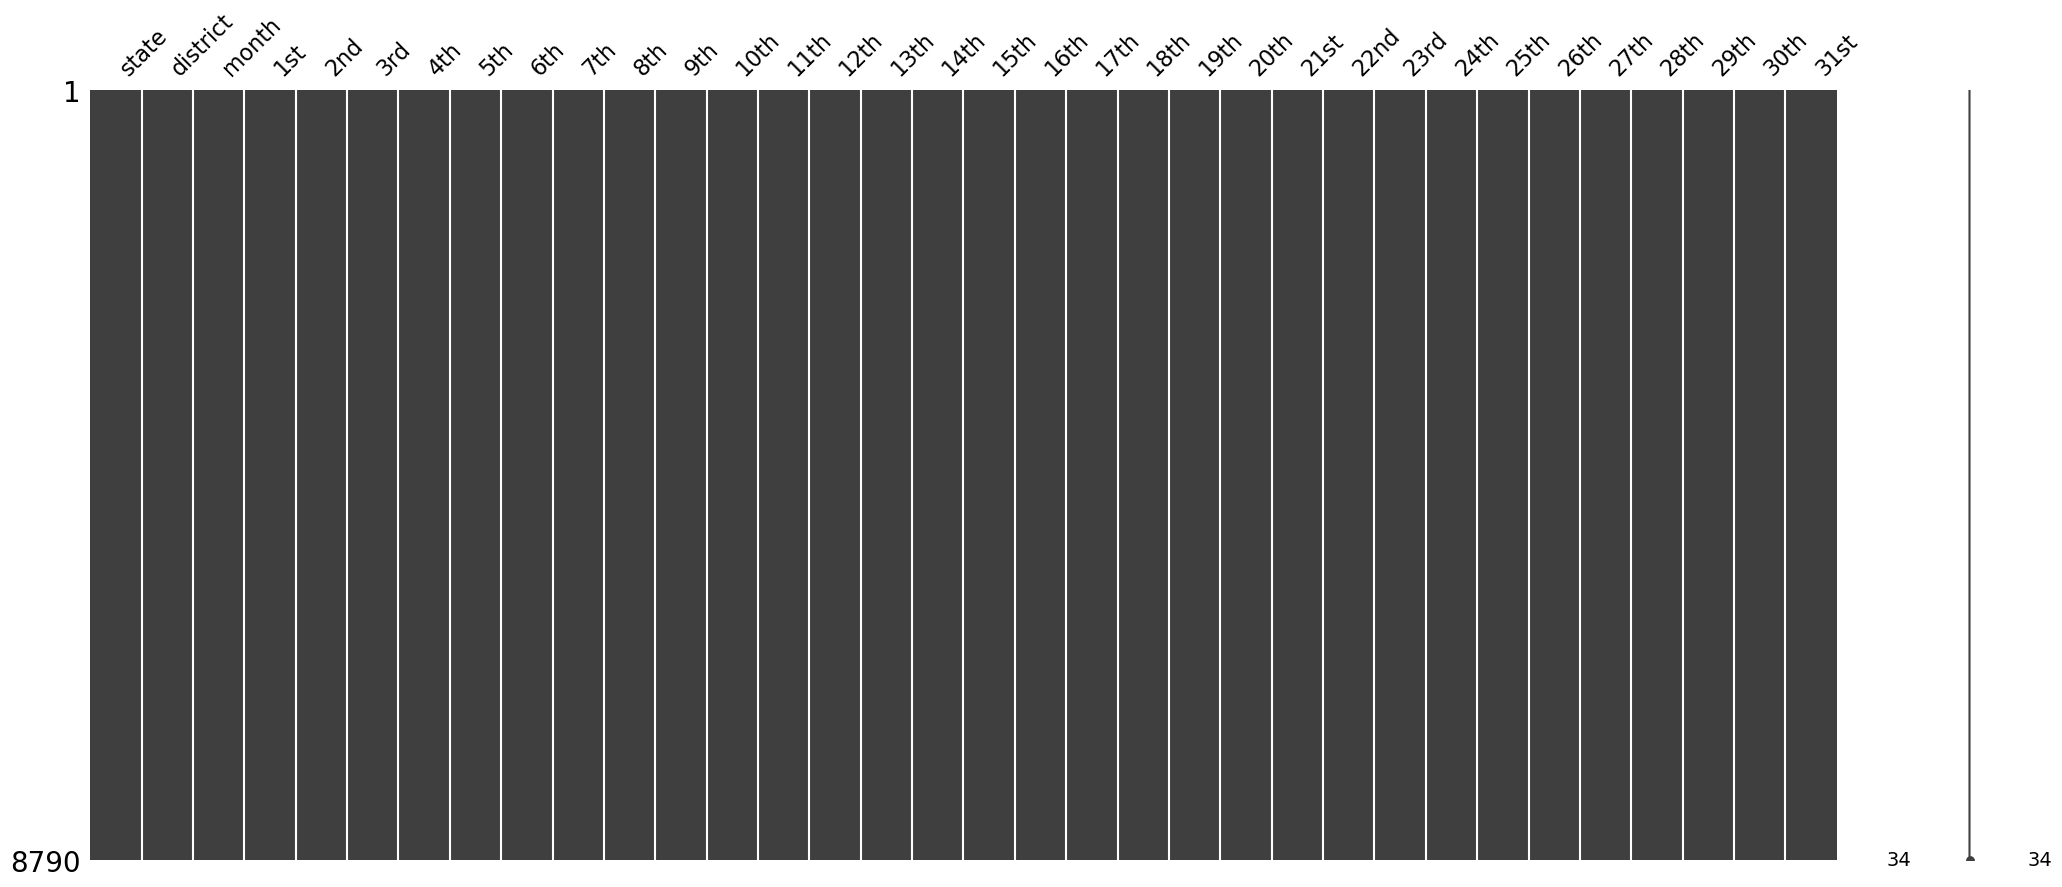

In [3]:
import missingno as msno
msno.matrix(rain)

# **Explorataion of Data**

In [4]:
# Display the first few rows of the dataset
print(rain.head())


               state                  district  month        1st       2nd  \
0  Andaman & Nicobar                  Nicobars      1   0.000000  0.000000   
1  Andaman & Nicobar  North And Middle Andaman      1   0.000000  0.000000   
2  Andaman & Nicobar            South Andamans      1   0.000000  0.000000   
3     Andhra Pradesh                 Anantapur      1   0.379965  0.000000   
4     Andhra Pradesh                  Chittoor      1  14.144900  0.857263   

   3rd  4th  5th  6th  7th  ...  22nd  23rd      24th      25th      26th  \
0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.000000   
1  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.000000   
2  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.000000   
3  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.000000  0.000000  0.205834   
4  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0  0.615237  0.925098  0.507623   

       27th      28th  29th  30th  31st  
0  0.000000  0.000000   0.

In [5]:
# Check the summary of the dataset
print(rain.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     8790 non-null   object 
 1   district  8790 non-null   object 
 2   month     8790 non-null   int64  
 3   1st       8790 non-null   float64
 4   2nd       8790 non-null   float64
 5   3rd       8790 non-null   float64
 6   4th       8790 non-null   float64
 7   5th       8790 non-null   float64
 8   6th       8790 non-null   float64
 9   7th       8790 non-null   float64
 10  8th       8790 non-null   float64
 11  9th       8790 non-null   float64
 12  10th      8790 non-null   float64
 13  11th      8790 non-null   float64
 14  12th      8790 non-null   float64
 15  13th      8790 non-null   float64
 16  14th      8790 non-null   float64
 17  15th      8790 non-null   float64
 18  16th      8790 non-null   float64
 19  17th      8790 non-null   float64
 20  18th      8790 non-null   floa

In [6]:
# Check for missing values
print(rain.isnull().sum())


state       0
district    0
month       0
1st         0
2nd         0
3rd         0
4th         0
5th         0
6th         0
7th         0
8th         0
9th         0
10th        0
11th        0
12th        0
13th        0
14th        0
15th        0
16th        0
17th        0
18th        0
19th        0
20th        0
21st        0
22nd        0
23rd        0
24th        0
25th        0
26th        0
27th        0
28th        0
29th        0
30th        0
31st        0
dtype: int64


In [7]:
# Descriptive statistics for numerical columns
print(rain.describe())


             month          1st          2nd          3rd          4th  \
count  8790.000000  8790.000000  8790.000000  8790.000000  8790.000000   
mean      6.502162     3.493094     3.210606     2.915560     3.909056   
std       3.452281     9.824910     9.245431     7.179966     9.192568   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       4.000000     0.000000     0.000000     0.000000     0.000000   
50%       7.000000     0.000000     0.000000     0.000000     0.000024   
75%      10.000000     1.754773     2.130985     1.721510     3.528917   
max      12.000000   218.306000   321.706000    83.310000   183.320000   

               5th          6th          7th          8th          9th  ...  \
count  8790.000000  8790.000000  8790.000000  8790.000000  8790.000000  ...   
mean      4.256830     4.754248     3.174247     3.746569     4.176870  ...   
std      10.675278    12.634238     8.454718    10.272592    11.560505  ...   
min       0.00000

# **Visualisation**

/tmp/ipykernel_20/647332889.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_rainfall_by_district = rain.groupby('district').sum().sum(axis=1)


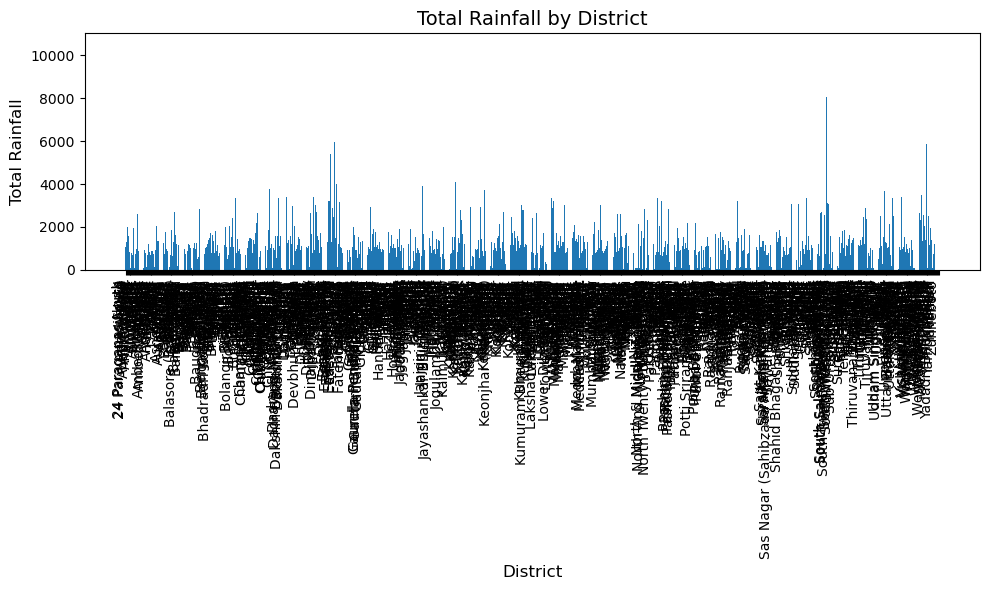

In [8]:
import matplotlib.pyplot as plt

# Plot the total rainfall by district
total_rainfall_by_district = rain.groupby('district').sum().sum(axis=1)

plt.figure(figsize=(10, 6))
plt.bar(total_rainfall_by_district.index, total_rainfall_by_district)
plt.xlabel('District', fontsize=12)  # Reduce the font size for x-axis label
plt.ylabel('Total Rainfall', fontsize=12)  # Reduce the font size for y-axis label
plt.title('Total Rainfall by District', fontsize=14)  # Increase the font size for the title

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate the labels by 45 degrees and align them to the right

plt.tight_layout()  # Adjust the layout to prevent clipping of labels
plt.show()


/tmp/ipykernel_20/1988129016.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_rainfall_by_month = rain.groupby('month').mean().mean(axis=1)


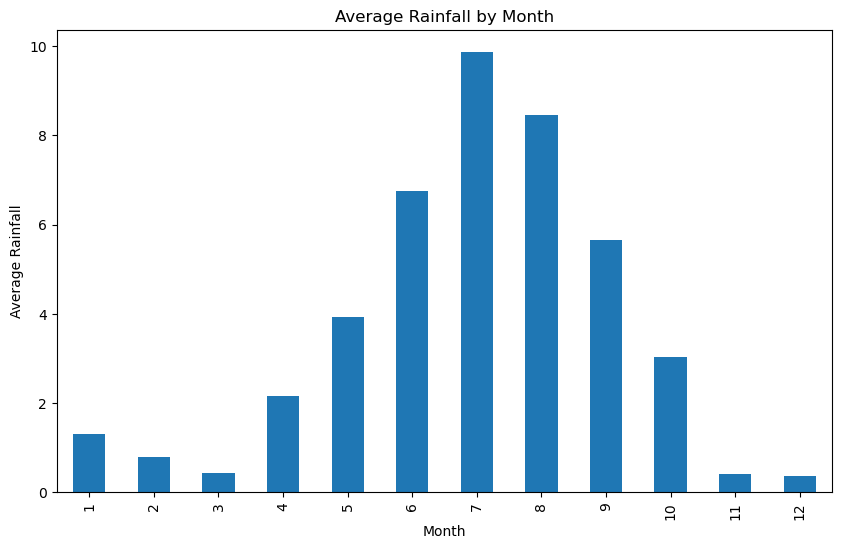

In [9]:
# Plot the average rainfall by month
average_rainfall_by_month = rain.groupby('month').mean().mean(axis=1)
average_rainfall_by_month.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Average Rainfall')
plt.title('Average Rainfall by Month')
plt.show()


# **Andaman & Nicobar Analysis**

In [10]:
# Extract rows where the state is 'Andaman & Nicobar'
andaman_nicobar_data = rain[rain['state'] == 'Andaman & Nicobar']

# Display the extracted data
andaman_nicobar_data

state                  district  month  1st  2nd  3rd  4th  \
0     Andaman & Nicobar                  Nicobars      1  0.0  0.0  0.0  0.0   
1     Andaman & Nicobar  North And Middle Andaman      1  0.0  0.0  0.0  0.0   
2     Andaman & Nicobar            South Andamans      1  0.0  0.0  0.0  0.0   
732   Andaman & Nicobar                  Nicobars      2  0.0  0.0  0.0  0.0   
733   Andaman & Nicobar  North And Middle Andaman      2  0.0  0.0  0.0  0.0   
734   Andaman & Nicobar            South Andamans      2  0.0  0.0  0.0  0.0   
1464  Andaman & Nicobar                  Nicobars      3  0.0  0.0  0.0  0.0   
1465  Andaman & Nicobar  North And Middle Andaman      3  0.0  0.0  0.0  0.0   
1466  Andaman & Nicobar            South Andamans      3  0.0  0.0  0.0  0.0   
2196  Andaman & Nicobar                  Nicobars      4  0.0  0.0  0.0  0.0   
2197  Andaman & Nicobar  North And Middle Andaman      4  0.0  0.0  0.0  0.0   
2198  Andaman & Nicobar            South Andamans      4  0.0  0.0  0.0  0.0   
2928  Andaman & Nicobar                  Nicobars      5  0.0  0.0  0.0  0.0   
2929  Andaman & Nicobar  North And Middle Andaman      5  0.0  0.0  0.0  0.0   
2930  Andaman & Nicobar            South Andamans      5  0.0  0.0  0.0  0.0   
3660  Andaman & Nicobar                  Nicobars      6  0.0  0.0  0.0  0.0   
3661  Andaman & Nicobar  North And Middle Andaman      6  0.0  0.0  0.0  0.0   
3662  Andaman & Nicobar            South Andamans      6  0.0  0.0  0.0  0.0   
4392  Andaman & Nicobar                  Nicobars      7  0.0  0.0  0.0  0.0   
4393  Andaman & Nicobar  North And Middle Andaman      7  0.0  0.0  0.0  0.0   
4394  Andaman & Nicobar            South Andamans      7  0.0  0.0  0.0  0.0   
5124  Andaman & Nicobar                  Nicobars      8  0.0  0.0  0.0  0.0   
5125  Andaman & Nicobar  North And Middle Andaman      8  0.0  0.0  0.0  0.0   
5126  Andaman & Nicobar            South Andamans      8  0.0  0.0  0.0  0.0   
5858  Andaman & Nicobar                  Nicobars      9  0.0  0.0  0.0  0.0   
5859  Andaman & Nicobar  North And Middle Andaman      9  0.0  0.0  0.0  0.0   
5860  Andaman & Nicobar            South Andamans      9  0.0  0.0  0.0  0.0   
6591  Andaman & Nicobar                   Nicobar     10  0.0  0.0  0.0  0.0   
6592  Andaman & Nicobar    North & Middle Andaman     10  0.0  0.0  0.0  0.0   
6593  Andaman & Nicobar             South Andaman     10  0.0  0.0  0.0  0.0   
7324  Andaman & Nicobar                  Nicobars     11  0.0  0.0  0.0  0.0   
7325  Andaman & Nicobar  North And Middle Andaman     11  0.0  0.0  0.0  0.0   
7326  Andaman & Nicobar            South Andamans     11  0.0  0.0  0.0  0.0   
8057  Andaman & Nicobar                  Nicobars     12  0.0  0.0  0.0  0.0   
8058  Andaman & Nicobar  North And Middle Andaman     12  0.0  0.0  0.0  0.0   
8059  Andaman & Nicobar            South Andamans     12  0.0  0.0  0.0  0.0   

      5th  6th  7th  ...  22nd  23rd  24th  25th  26th  27th  28th  29th  \
0     0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1     0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2     0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
732   0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
733   0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
734   0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1464  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1465  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1466  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2196  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2197  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2198  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2928  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

In [11]:
# Calculate total rainfall for each district in each month
andaman_nicobar_data['Total_Rainfall'] = andaman_nicobar_data.iloc[:, 3:].sum(axis=1)

# Display the updated DataFrame with the new column 'Total_Rainfall'
print(andaman_nicobar_data[['state', 'district', 'month', 'Total_Rainfall']])


                  state                  district  month  Total_Rainfall
0     Andaman & Nicobar                  Nicobars      1             0.0
1     Andaman & Nicobar  North And Middle Andaman      1             0.0
2     Andaman & Nicobar            South Andamans      1             0.0
732   Andaman & Nicobar                  Nicobars      2             0.0
733   Andaman & Nicobar  North And Middle Andaman      2             0.0
734   Andaman & Nicobar            South Andamans      2             0.0
1464  Andaman & Nicobar                  Nicobars      3             0.0
1465  Andaman & Nicobar  North And Middle Andaman      3             0.0
1466  Andaman & Nicobar            South Andamans      3             0.0
2196  Andaman & Nicobar                  Nicobars      4             0.0
2197  Andaman & Nicobar  North And Middle Andaman      4             0.0
2198  Andaman & Nicobar            South Andamans      4             0.0
2928  Andaman & Nicobar                  Nicobars  

/tmp/ipykernel_20/1563053291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  andaman_nicobar_data['Total_Rainfall'] = andaman_nicobar_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

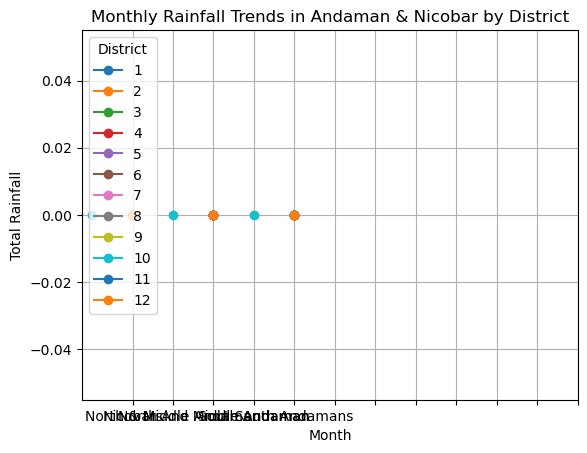

In [12]:
import matplotlib.pyplot as plt

# Group data by district and month, and calculate the monthly total rainfall
monthly_rainfall_by_district = andaman_nicobar_data.groupby(['district', 'month'])['Total_Rainfall'].sum().unstack()

# Plot monthly rainfall trends for different districts in Andaman & Nicobar
plt.figure(figsize=(12, 6))
monthly_rainfall_by_district.plot(marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Rainfall')
plt.title('Monthly Rainfall Trends in Andaman & Nicobar by District')
plt.legend(title='District', loc='upper left')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


In [13]:
# Calculate the average rainfall for each district in each month
average_rainfall_by_district = andaman_nicobar_data.groupby(['district', 'month'])['Total_Rainfall'].mean().unstack()

# Display the average rainfall for each district in each month
print(average_rainfall_by_district)


month                      1    2    3    4    5    6    7    8    9    10  \
district                                                                     
Nicobar                   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0   
Nicobars                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN   
North & Middle Andaman    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0   
North And Middle Andaman  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN   
South Andaman             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0   
South Andamans            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN   

month                      11   12  
district                            
Nicobar                   NaN  NaN  
Nicobars                  0.0  0.0  
North & Middle Andaman    NaN  NaN  
North And Middle Andaman  0.0  0.0  
South Andaman             NaN  NaN  
South Andamans            0.0  0.0  


In [14]:
# Find the maximum and minimum rainfall for each district
rainiest_months = andaman_nicobar_data.loc[andaman_nicobar_data.groupby(['district'])['Total_Rainfall'].idxmax()]
driest_months = andaman_nicobar_data.loc[andaman_nicobar_data.groupby(['district'])['Total_Rainfall'].idxmin()]

# Display the rainiest and driest months for each district
print("Rainiest Months:")
print(rainiest_months[['state', 'district', 'month', 'Total_Rainfall']])
print("\nDriest Months:")
print(driest_months[['state', 'district', 'month', 'Total_Rainfall']])


Rainiest Months:
                  state                  district  month  Total_Rainfall
6591  Andaman & Nicobar                   Nicobar     10             0.0
0     Andaman & Nicobar                  Nicobars      1             0.0
6592  Andaman & Nicobar    North & Middle Andaman     10             0.0
1     Andaman & Nicobar  North And Middle Andaman      1             0.0
6593  Andaman & Nicobar             South Andaman     10             0.0
2     Andaman & Nicobar            South Andamans      1             0.0

Driest Months:
                  state                  district  month  Total_Rainfall
6591  Andaman & Nicobar                   Nicobar     10             0.0
0     Andaman & Nicobar                  Nicobars      1             0.0
6592  Andaman & Nicobar    North & Middle Andaman     10             0.0
1     Andaman & Nicobar  North And Middle Andaman      1             0.0
6593  Andaman & Nicobar             South Andaman     10             0.0
2     Andaman & Ni

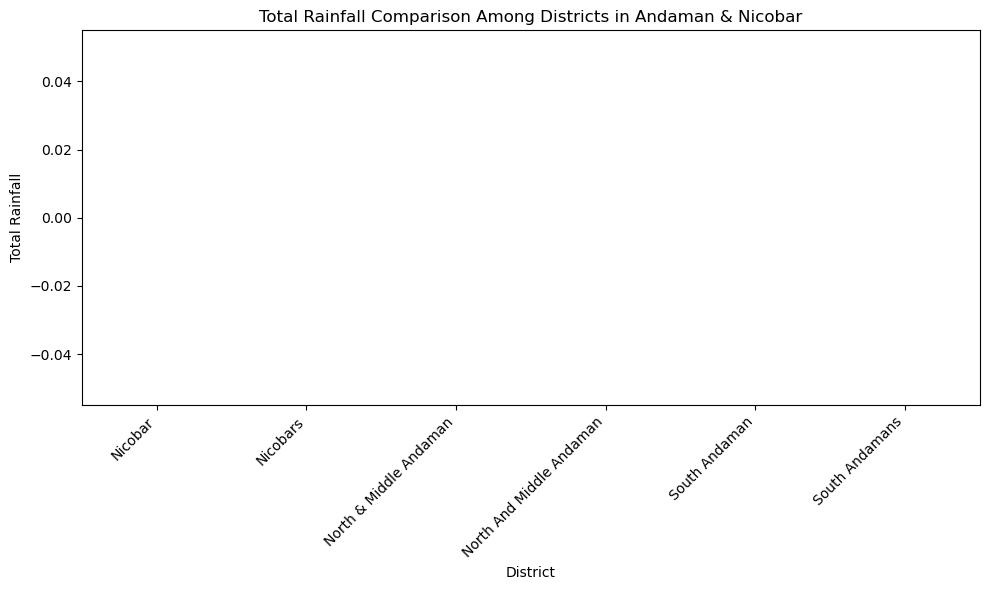

In [15]:
# Calculate the total rainfall for each district
total_rainfall_by_district = andaman_nicobar_data.groupby('district')['Total_Rainfall'].sum()

# Plot bar chart to compare total rainfall among districts in Andaman & Nicobar
plt.figure(figsize=(10, 6))
total_rainfall_by_district.sort_values().plot(kind='bar')
plt.xlabel('District')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall Comparison Among Districts in Andaman & Nicobar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


the monthly total rainfall : month                       1           2           3           4   \
district                                                             
Anjaw                61.631997   79.455020  109.761430  669.118111   
Changlang            45.903143   59.223580   65.693882  515.963503   
Dibang Valley        75.271652  123.442922  121.809395  642.669499   
East Kameng          20.516642   54.372977   62.744563  298.350979   
East Siang           63.410929   91.165306   68.402858  632.665709   
Kamle                31.747479   92.329721   50.293328  343.625540   
Kra Daadi            30.425870   58.678559  139.674773  458.849378   
Kurung Kumey         29.400984   57.588870  138.345707  442.314745   
Lepa Rada                  NaN         NaN         NaN         NaN   
Leparada             37.511442   85.707805   55.561062  372.738540   
Lohit                60.829513   79.042100  103.433602  669.260842   
Longding             22.411971   44.049377   36.878543  361.2

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

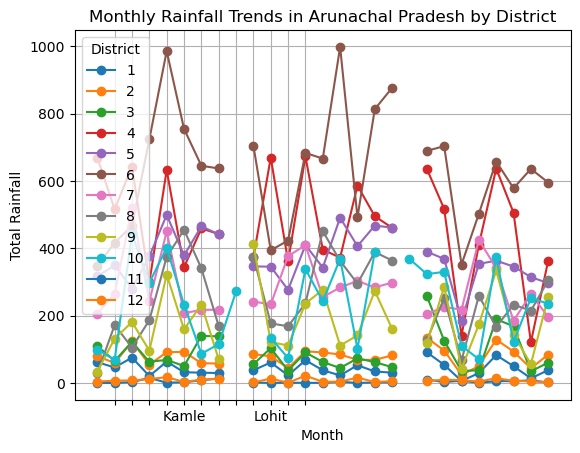

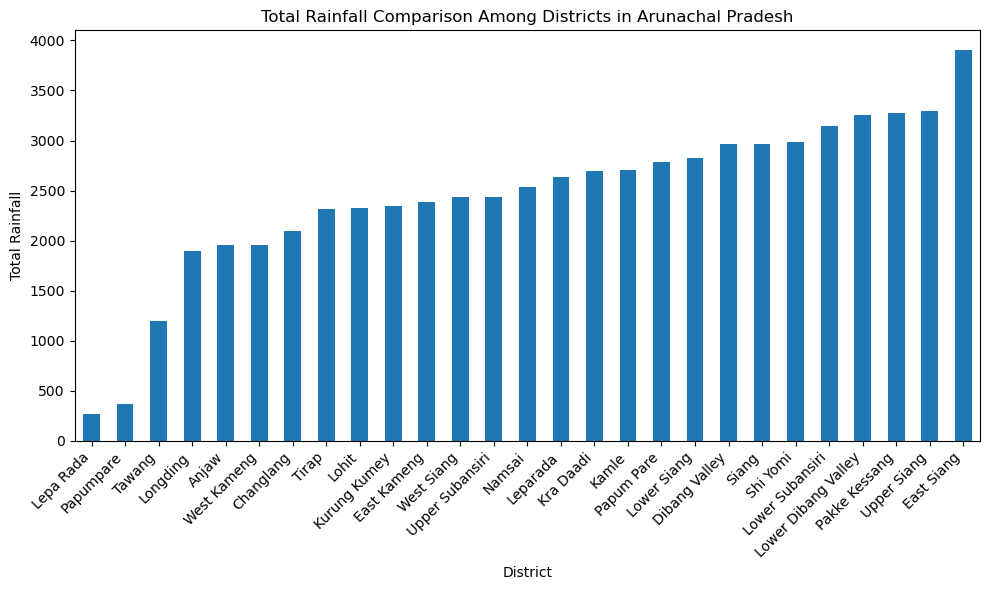

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_rainfall_data(state_name):
    
    # Create a new DataFrame to store the data for the specified state
    state_data = rain[rain['state'] == state_name]

    # Calculate total rainfall for each district in each month
    state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)

    # Group data by district and month, and calculate the monthly total rainfall
    monthly_rainfall_by_district = state_data.groupby(['district', 'month'])['Total_Rainfall'].sum().unstack()
    print("the monthly total rainfall :",monthly_rainfall_by_district)
    print("\n\n\n")
    # Calculate the average rainfall for each district in each month
    average_rainfall_by_district = state_data.groupby(['district', 'month'])['Total_Rainfall'].mean().unstack()
    print("average rainfall for each district in each month :",average_rainfall_by_district)
    print("\n\n\n")
    # Find the maximum and minimum rainfall for each district
    rainiest_months = state_data.loc[state_data.groupby(['district'])['Total_Rainfall'].idxmax()]
    driest_months = state_data.loc[state_data.groupby(['district'])['Total_Rainfall'].idxmin()]
    print("maximum rainfall for each district :",rainiest_months)
    print("minimum rainfall for each district :",driest_months)
    print("\n\n\n")
    # Calculate the total rainfall for each district
    total_rainfall_by_district = state_data.groupby('district')['Total_Rainfall'].sum()

    # Create a dictionary to store the results
    results = {
        'Total_Rainfall_By_District': state_data[['district', 'month', 'Total_Rainfall']],
        'Monthly_Rainfall_By_District': monthly_rainfall_by_district,
        'Average_Rainfall_By_District': average_rainfall_by_district,
        'Rainiest_Months_By_District': rainiest_months[['district', 'month', 'Total_Rainfall']],
        'Driest_Months_By_District': driest_months[['district', 'month', 'Total_Rainfall']],
        'Total_Rainfall_Comparison': total_rainfall_by_district
    }

    # Plot monthly rainfall trends for different districts
    plt.figure(figsize=(12, 6))
    monthly_rainfall_by_district.plot(marker='o', linestyle='-')
    plt.xlabel('Month')
    plt.ylabel('Total Rainfall')
    plt.title(f'Monthly Rainfall Trends in {state_name} by District')
    plt.legend(title='District', loc='upper left')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

    # Plot bar chart to compare total rainfall among districts in the specified state
    plt.figure(figsize=(10, 6))
    total_rainfall_by_district.sort_values().plot(kind='bar')
    plt.xlabel('District')
    plt.ylabel('Total Rainfall')
    plt.title(f'Total Rainfall Comparison Among Districts in {state_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return results


state_name = 'Arunachal Pradesh'
results = analyze_rainfall_data(state_name)


In [17]:
rain['state'].unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

the monthly total rainfall : month                      1    2    3    4    5    6    7    8    9    10  \
district                                                                     
Nicobar                   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0   
Nicobars                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN   
North & Middle Andaman    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0   
North And Middle Andaman  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN   
South Andaman             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0   
South Andamans            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN   

month                      11   12  
district                            
Nicobar                   NaN  NaN  
Nicobars                  0.0  0.0  
North & Middle Andaman    NaN  NaN  
North And Middle Andaman  0.0  0.0  
South Andaman             NaN  NaN  
South Andamans            0.0  0.0  




average rainfall for each district in each mon

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

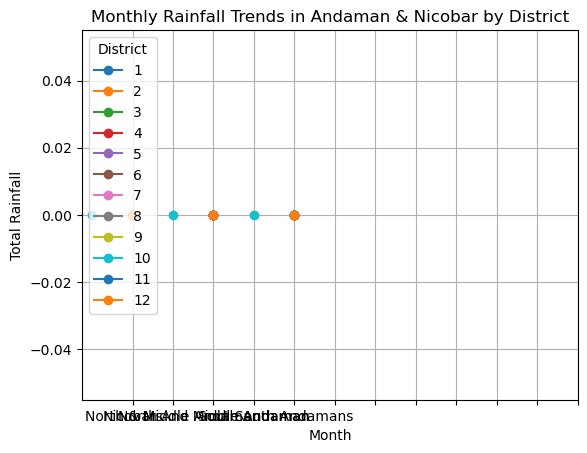

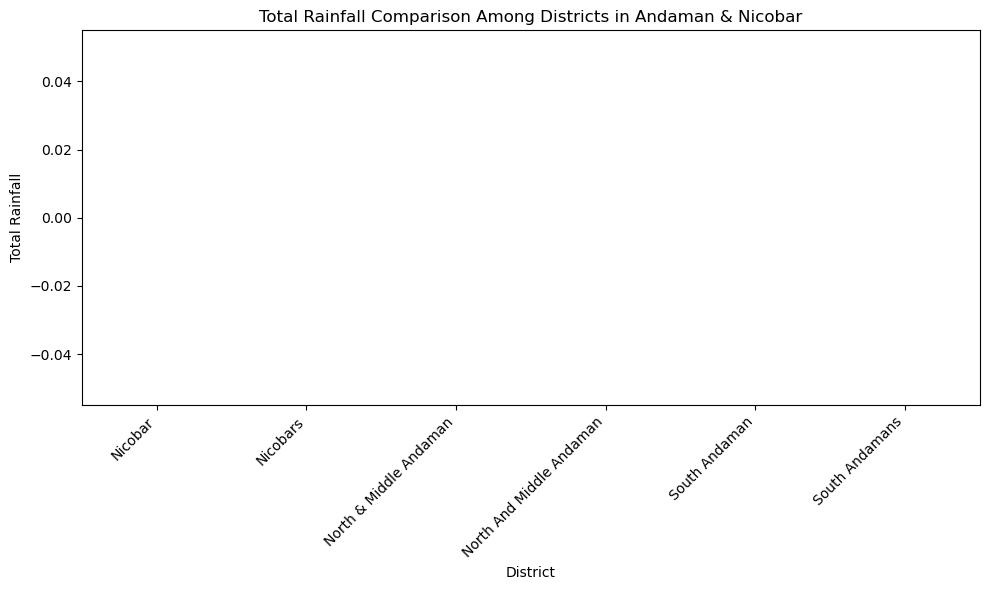

the monthly total rainfall : month                           1         2         3          4           5   \
district                                                                        
Anantapur                 2.609365  0.000000  3.296774   9.627556  108.343348   
Ananthapur                     NaN       NaN       NaN        NaN         NaN   
Chittoor                 26.160305  0.000000  1.965145   8.719310  121.138139   
East Godavari            19.614417  0.131804  7.221441  14.644475  116.055197   
Guntur                   28.106493  0.000000  0.218544   0.003129   62.225055   
Krishna                  21.443462  0.005833  1.414233   1.394272   41.060076   
Kurnool                   7.310015  0.000000  2.167889   7.787773   83.401398   
Potti Sriramulu Nellore        NaN       NaN       NaN        NaN         NaN   
Prakasam                 26.815422  0.000000  3.037771   0.050489  127.656979   
SPSR Nellore             56.209580  0.000000  2.081298   0.000000  129.264679   

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

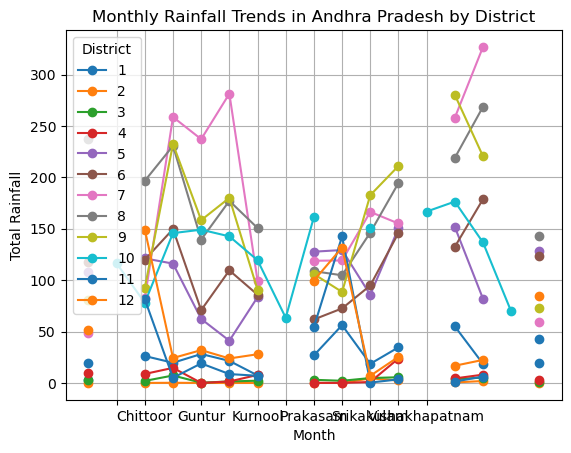

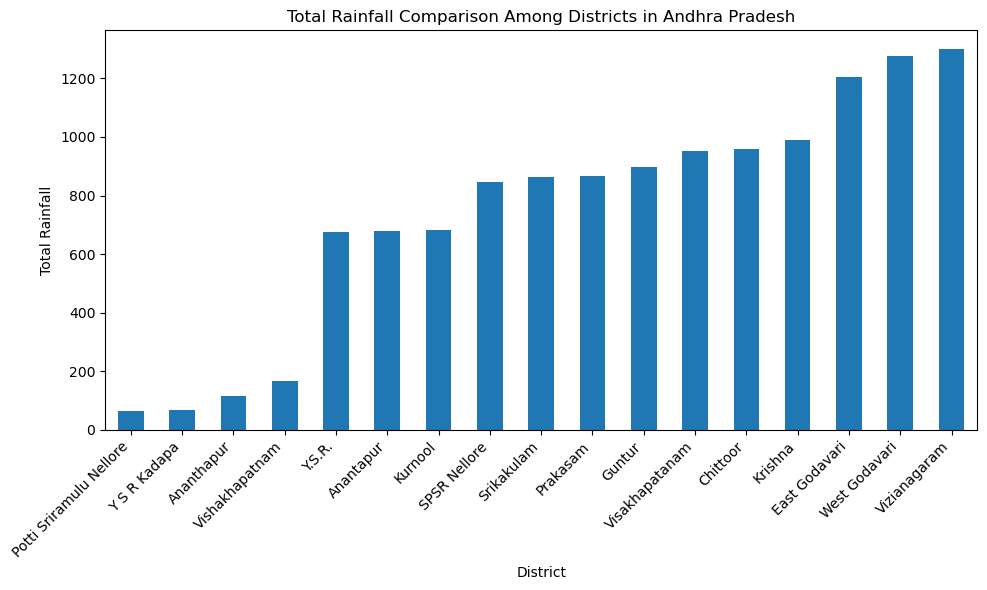

the monthly total rainfall : month                       1           2           3           4   \
district                                                             
Anjaw                61.631997   79.455020  109.761430  669.118111   
Changlang            45.903143   59.223580   65.693882  515.963503   
Dibang Valley        75.271652  123.442922  121.809395  642.669499   
East Kameng          20.516642   54.372977   62.744563  298.350979   
East Siang           63.410929   91.165306   68.402858  632.665709   
Kamle                31.747479   92.329721   50.293328  343.625540   
Kra Daadi            30.425870   58.678559  139.674773  458.849378   
Kurung Kumey         29.400984   57.588870  138.345707  442.314745   
Lepa Rada                  NaN         NaN         NaN         NaN   
Leparada             37.511442   85.707805   55.561062  372.738540   
Lohit                60.829513   79.042100  103.433602  669.260842   
Longding             22.411971   44.049377   36.878543  361.2

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

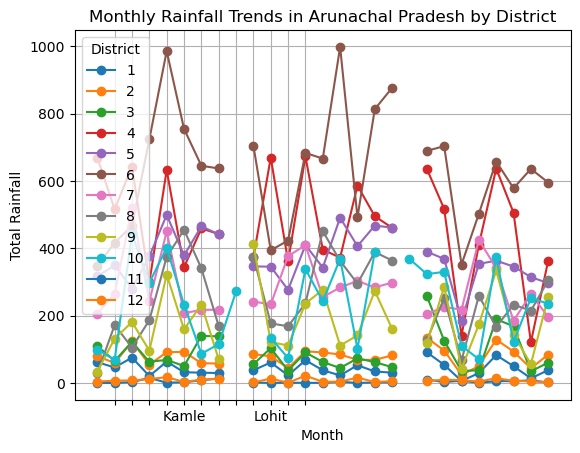

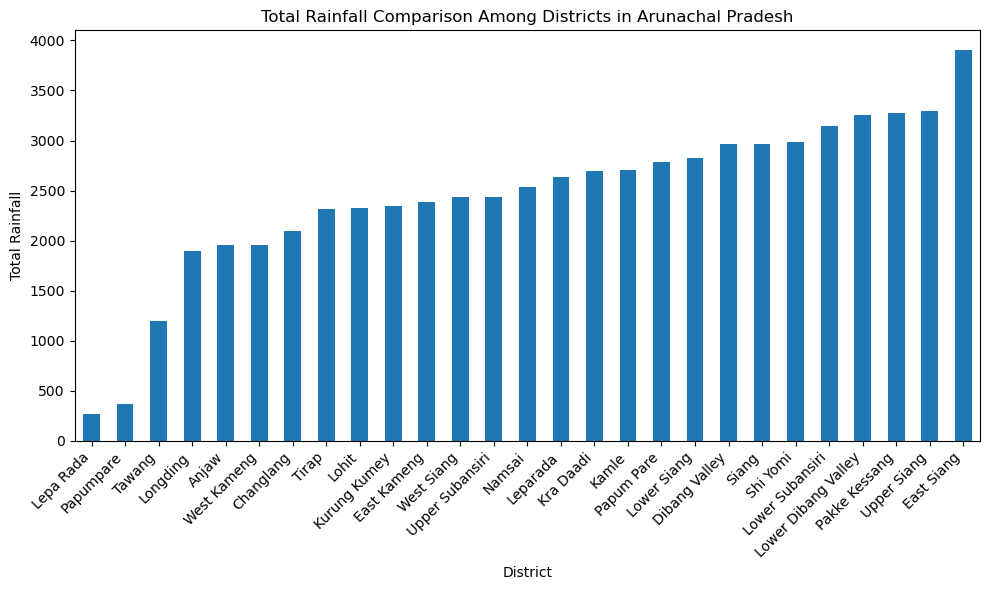

the monthly total rainfall : month                           1          2          3           4   \
district                                                               
Baksa                    19.053600  80.375613  44.921374  429.864878   
Barpeta                  28.471023  51.339269  31.494874  331.055027   
Biswanath                34.340201  63.960514  43.506071  384.428868   
Bongaigaon               17.111732  65.902369  23.189519  514.538356   
Cachar                   25.375820  46.343558  90.364644  287.609033   
Charaideo                28.254012  56.558582  46.738153  454.306694   
Chirang                  23.239437  76.989919  40.150054  488.514642   
Darrang                  18.891965  55.721317  48.301182  280.313744   
Dhemaji                  33.861171  73.445096  61.160186  401.819962   
Dhubri                    9.364748  59.538265  35.756380  396.605157   
Dibrugarh                31.156477  59.337526  50.895385  448.011851   
Dima Hasao               22.114241 

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

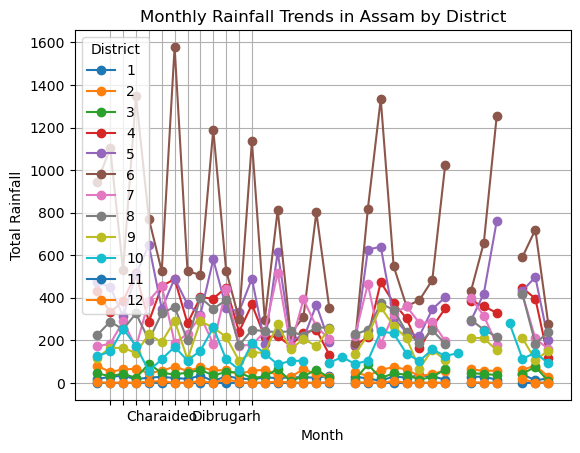

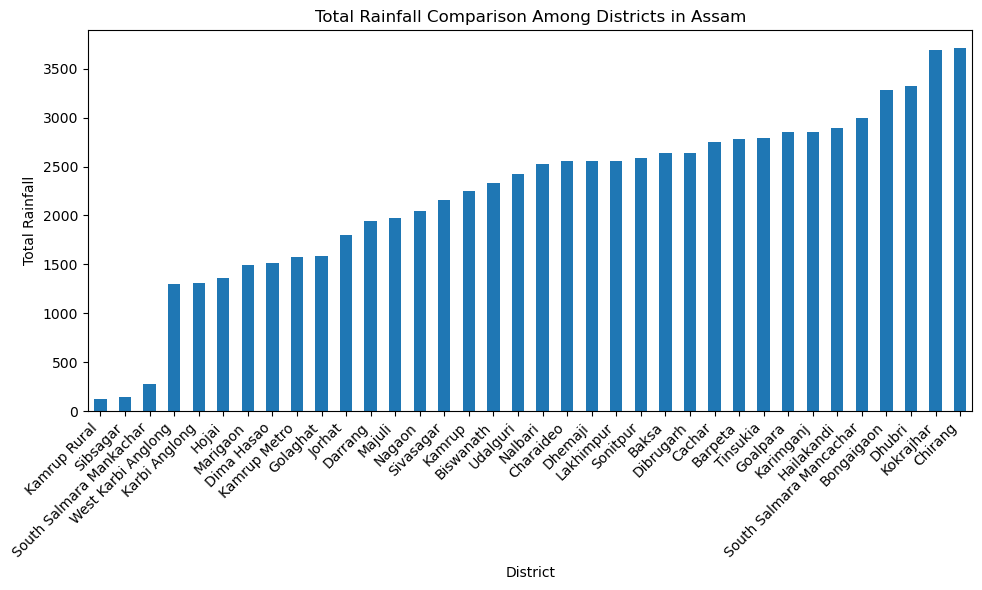

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


the monthly total rainfall : month                       1          2          3          4           5   \
district                                                                      
Araria                2.814914  23.727687   0.723956  39.655581  158.737641   
Arwal                31.290251  12.153935   0.000000   0.000000   45.671506   
Aurangabad            8.245670   3.884105   3.652663   0.000000    4.755289   
Banka                10.422886  37.508499   0.000000   1.213835   98.588583   
Begusarai            13.032441  44.084542   0.000000   8.270030   67.257652   
Bhagalpur             3.425337  35.209643   0.106450  17.188758  117.406199   
Bhojpur              19.970583  13.627971   0.000000   0.076192   39.368151   
Buxar                15.516219  10.885450   0.000000   0.000000   20.698198   
Darbhanga             3.690879  25.058284   0.000000  24.416550  170.992760   
Gaya                 27.165644  23.600519   0.000000   2.468454   39.554635   
Gopalganj            11

<Figure size 1200x600 with 0 Axes>

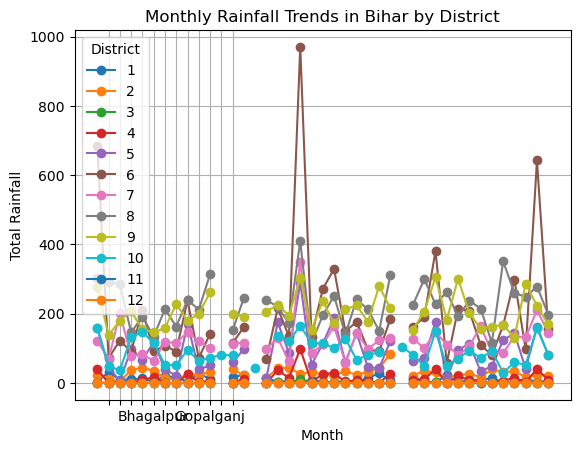

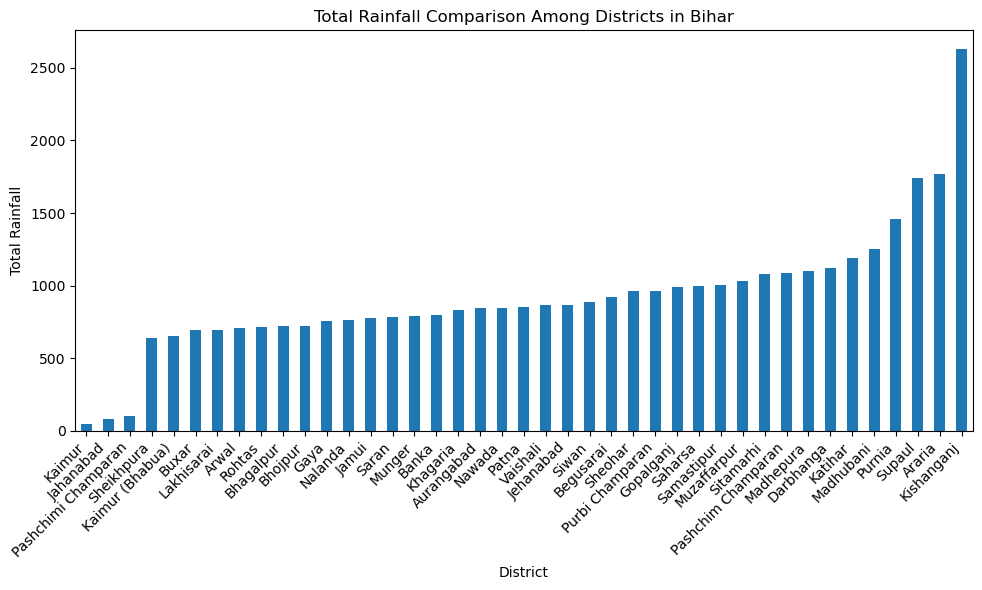

the monthly total rainfall : month          1     2    3    4     5     6      7          8      9     10  \
district                                                                       
Chandigarh  205.7  37.6  0.0  0.4  33.1  75.4  432.3  110.32714  192.8  40.1   

month          11   12  
district                
Chandigarh  0.003  0.0  




average rainfall for each district in each month : month          1     2    3    4     5     6      7          8      9     10  \
district                                                                       
Chandigarh  205.7  37.6  0.0  0.4  33.1  75.4  432.3  110.32714  192.8  40.1   

month          11   12  
district                
Chandigarh  0.003  0.0  




maximum rainfall for each district :            state    district  month   1st  2nd   3rd  4th  5th   6th  7th  \
4504  Chandigarh  Chandigarh      7  60.3  3.5  30.6  0.0  0.0  59.2  3.9   

      ...  23rd  24th  25th  26th  27th  28th  29th  30th  31st  \
4504  ...   0.0   6.8

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

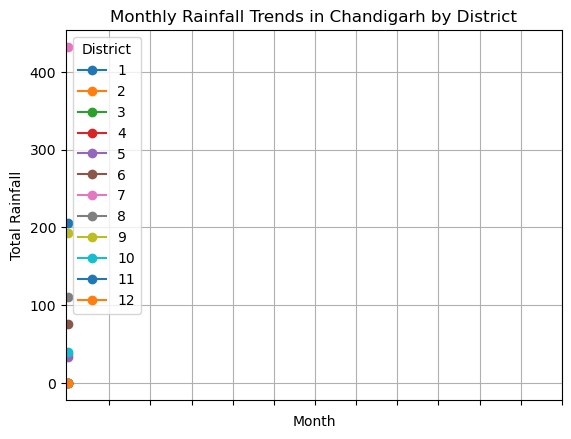

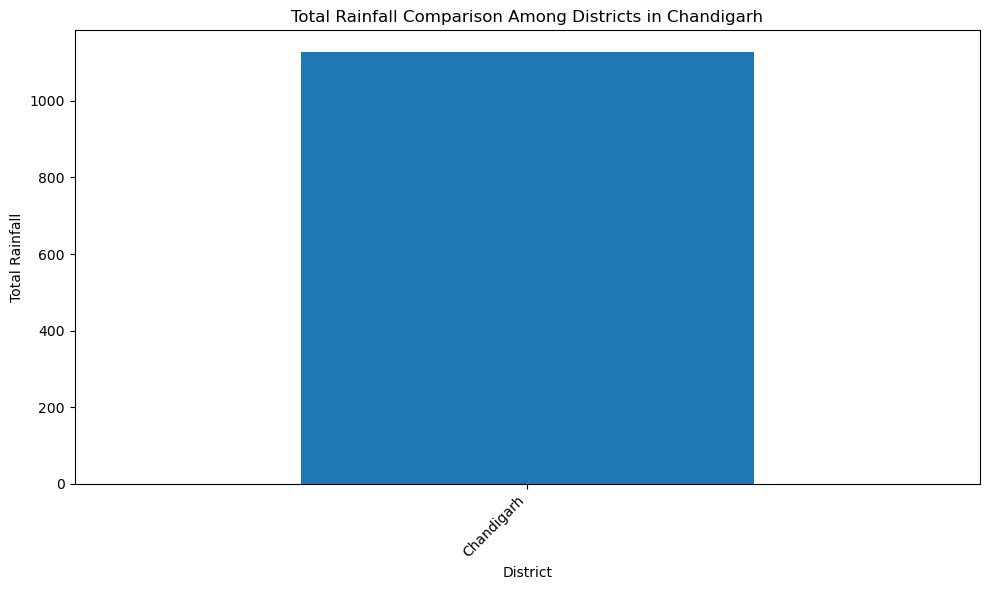

the monthly total rainfall : month                             1          2         3          4   \
district                                                               
Balod                      51.457791   2.425491  0.000000   8.869513   
Baloda Bazar               18.006481   2.228125  0.397931   6.944619   
Balrampur                  23.575873  28.896789  0.270894   0.621147   
Bastar                     54.802460   2.755482  0.198168  58.065839   
Bemetara                   24.541536   6.618092  0.447803   4.703864   
Bijapur                    43.122518   0.115237  0.223878  14.420079   
Bilapur                          NaN        NaN       NaN        NaN   
Bilaspur                   19.030652  11.671903  0.911947   4.262390   
Dakshin Bastar Dantewada         NaN        NaN       NaN        NaN   
Dantewada                  32.434820   0.050257  0.169160  26.538246   
Dhamtari                   52.702951   0.135377  0.005640   5.806032   
Durg                       30.98364

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

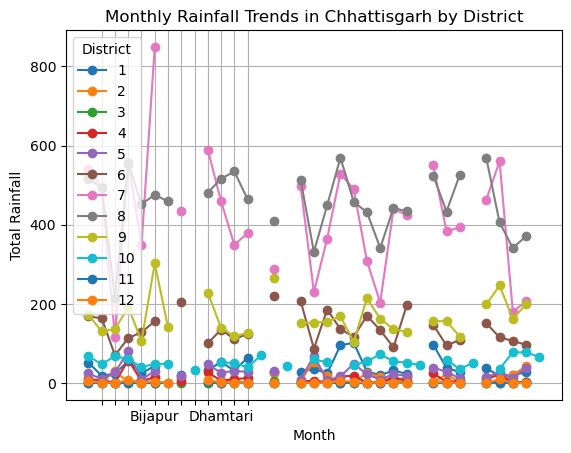

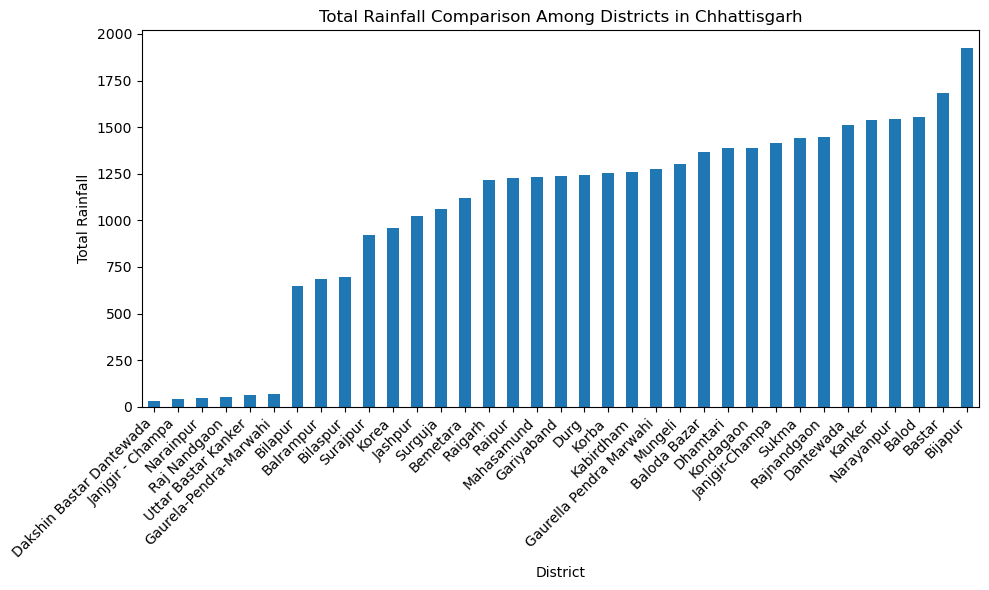

the monthly total rainfall : month                    1    2    3    4    5           6            7   \
district                                                                   
Dadra & Nagar Haveli    NaN  NaN  NaN  NaN  NaN         NaN          NaN   
Dadra And Nagar Haveli  0.0  0.0  0.0  0.0  0.0  171.283598  2070.656554   

month                           8           9          10   11        12  
district                                                                  
Dadra & Nagar Haveli           NaN         NaN  86.461351  NaN       NaN  
Dadra And Nagar Haveli  551.716687  647.683355        NaN  0.0  0.140784  




average rainfall for each district in each month : month                    1    2    3    4    5           6            7   \
district                                                                   
Dadra & Nagar Haveli    NaN  NaN  NaN  NaN  NaN         NaN          NaN   
Dadra And Nagar Haveli  0.0  0.0  0.0  0.0  0.0  171.283598  2070.656554   

month 

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

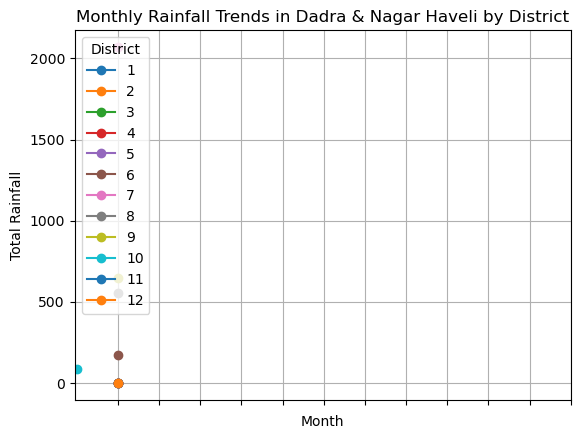

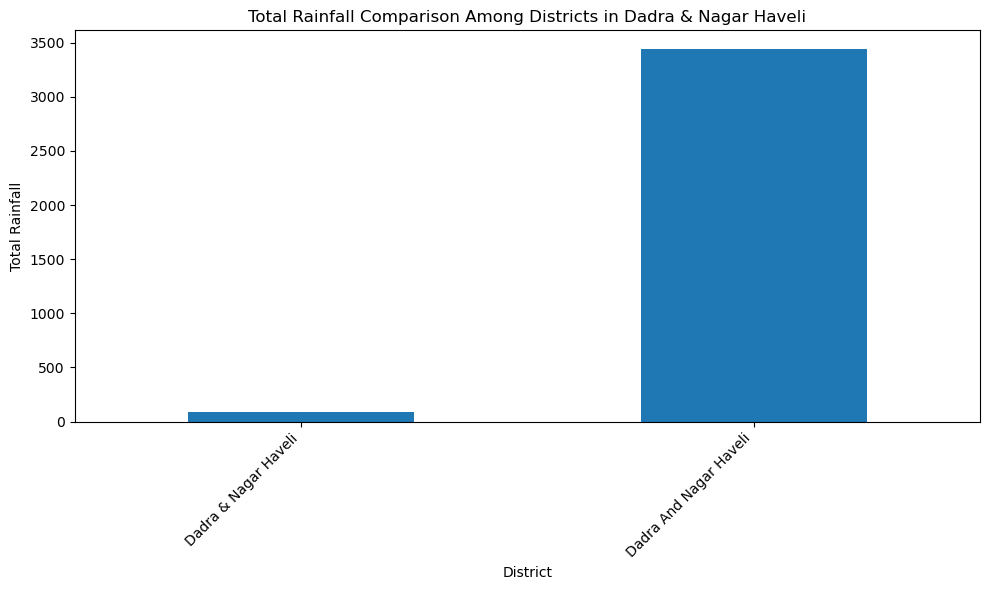

the monthly total rainfall : month           1    2    3        4         5           6            7   \
district                                                                   
Daman     0.000000  0.0  0.0  0.00000  0.521967  244.433658  1790.721231   
Diu       2.764742  0.0  0.0  1.86318  0.000000   65.538965   539.492023   

month             8           9          10   11        12  
district                                                    
Daman     462.376147  758.612684  40.686530  0.0  1.861229  
Diu       202.542250  162.675998   6.958432  0.0  0.001585  




average rainfall for each district in each month : month           1    2    3        4         5           6            7   \
district                                                                   
Daman     0.000000  0.0  0.0  0.00000  0.521967  244.433658  1790.721231   
Diu       2.764742  0.0  0.0  1.86318  0.000000   65.538965   539.492023   

month             8           9          10   11        12  
d

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

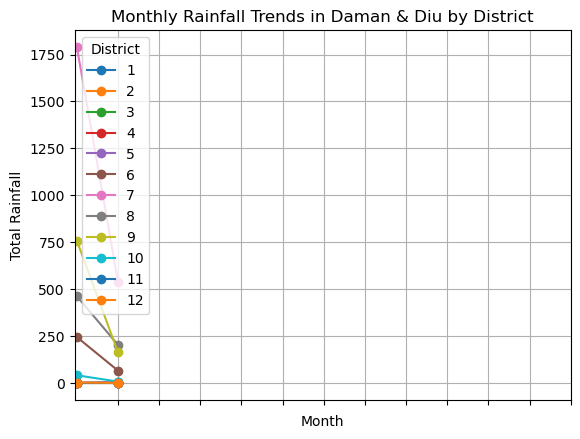

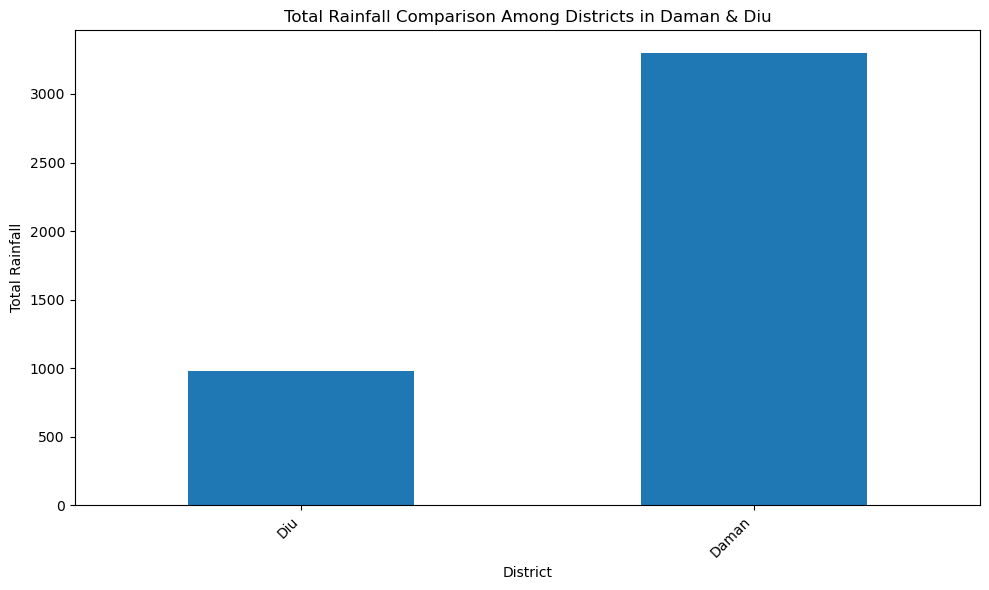

the monthly total rainfall : month              1           2           3           4           5   \
district                                                                
Central     51.076090   16.025359    0.000000    0.000000   35.189765   
East        20.237845   57.017576   69.992446  369.148038  415.823670   
New Delhi   66.064710   16.388470    0.000000    0.189975   60.691639   
North       52.954320  126.088932  113.835723  384.284832  387.099608   
North East  51.100000   16.300000    0.000000    0.000000   30.700000   
North West  82.972750   19.197572    0.000000    0.000000   57.108801   
Shahadra          NaN         NaN         NaN         NaN         NaN   
Shahdara    51.100000   16.300000    0.000000    0.000000   30.700000   
South       35.729435   71.282738   82.280143  327.187055  384.948652   
South East  50.900000   14.000000    0.000000    0.000000   68.300000   
South West  97.183771   20.359841    0.000000    0.503328   55.742832   
West        44.817364 

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

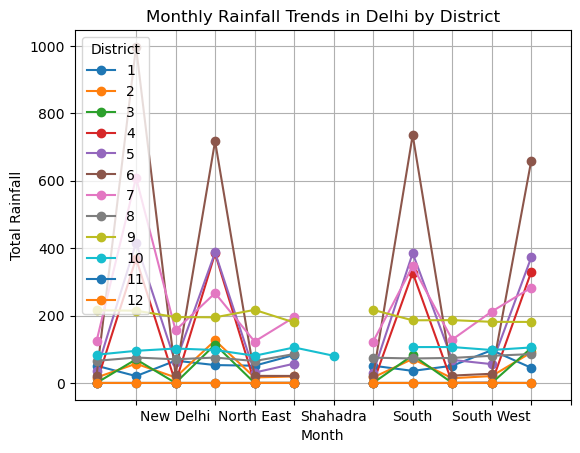

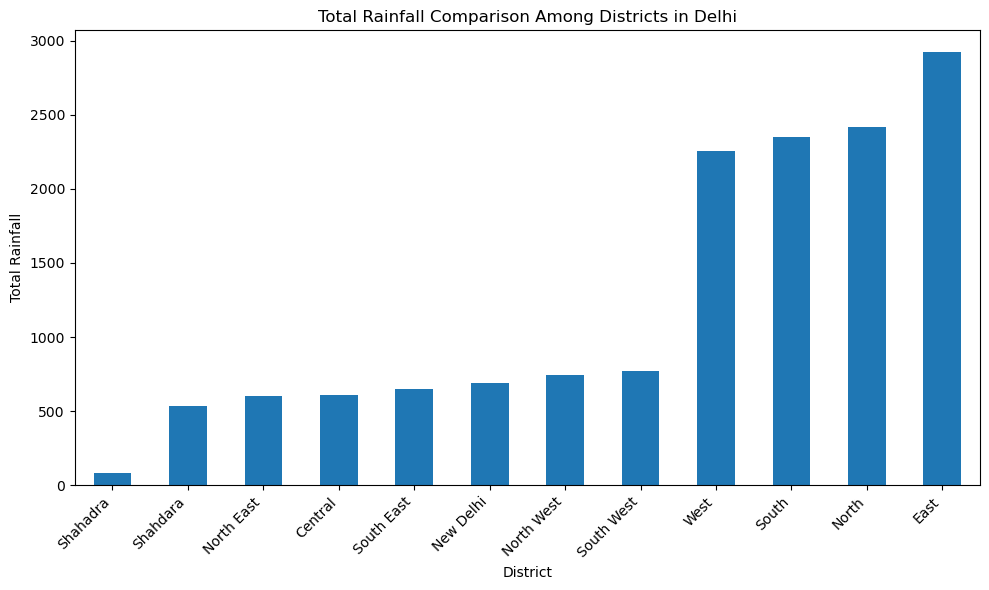

the monthly total rainfall : month            1    2          3          4           5           6   \
district                                                                 
North Goa  0.762354  0.0  10.410925  44.057617  120.772104  731.254447   
South Goa  0.719332  0.0   3.848076  32.501368  113.731231  765.221835   

month               7          8           9          10        11       12  
district                                                                     
North Goa  1416.263621  362.38549  366.609445  53.754893  1.007574  6.19618  
South Goa  1534.769890  278.43574  239.964465  56.075331  6.856742  8.58625  




average rainfall for each district in each month : month            1    2          3          4           5           6   \
district                                                                 
North Goa  0.762354  0.0  10.410925  44.057617  120.772104  731.254447   
South Goa  0.719332  0.0   3.848076  32.501368  113.731231  765.221835   

month     

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

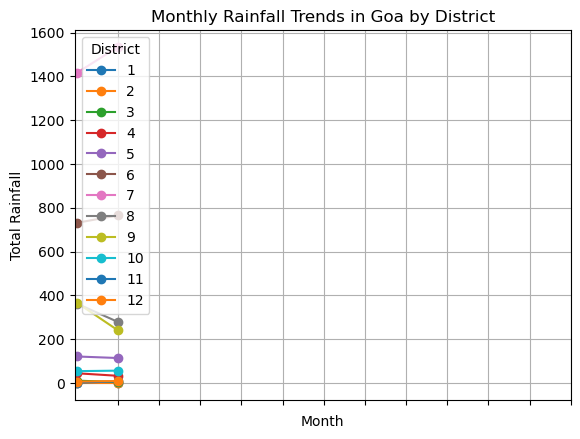

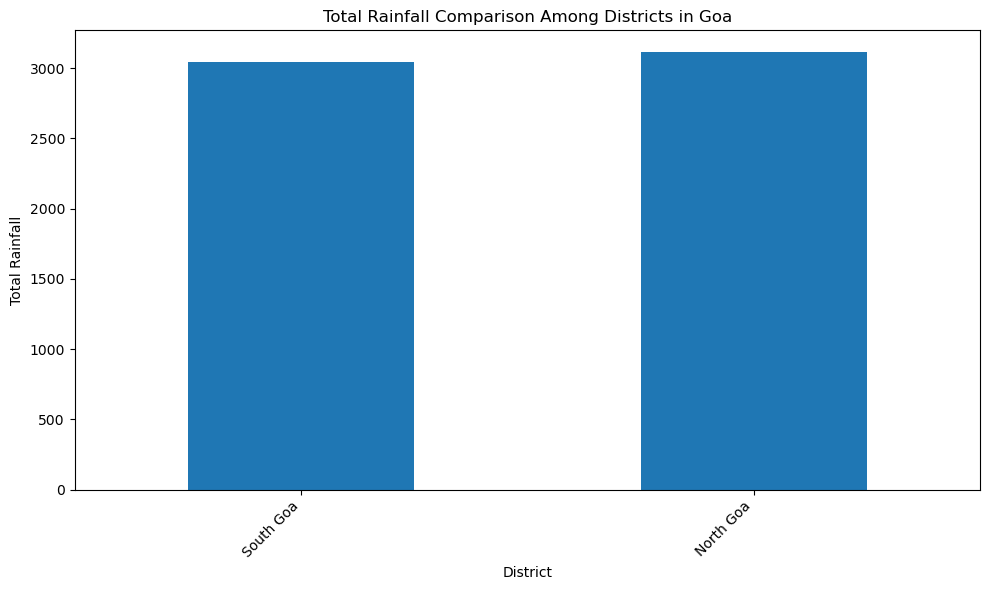

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


the monthly total rainfall : month                   1    2         3         4         5           6   \
district                                                                    
Ahmadabad         1.002227  0.0  0.000000  0.000000  0.000000   46.906772   
Amreli            0.425275  0.0  0.000000  0.003154  0.580302   84.206901   
Anand             0.000000  0.0  0.000000  0.000000  0.000000   45.131075   
Aravalli               NaN  NaN       NaN       NaN       NaN         NaN   
Arvalli           1.488744  0.0  0.000000  0.000000  0.026488   61.439076   
Banas Kantha      2.595514  0.0  0.000000  0.000000  0.049764   20.412911   
Bharuch           0.112149  0.0  0.094081  0.000000  0.000000   59.492343   
Bhavnagar         0.074808  0.0  0.000000  0.000000  0.000314   41.494997   
Botad             0.975184  0.0  0.000000  0.000000  0.000000   58.842975   
Chhota Udepur          NaN  NaN       NaN       NaN       NaN         NaN   
Chhotaudepur      1.901647  0.0  0.011828  0.00

<Figure size 1200x600 with 0 Axes>

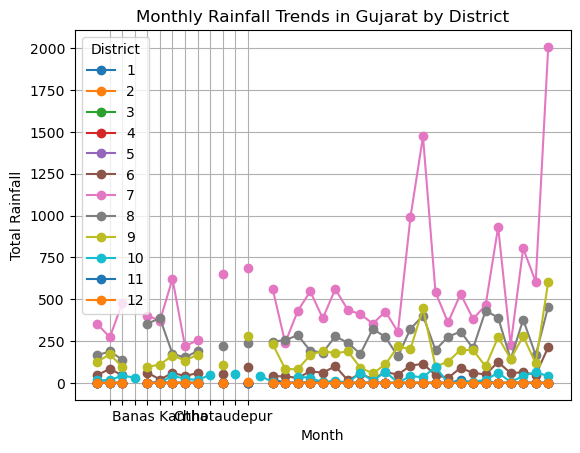

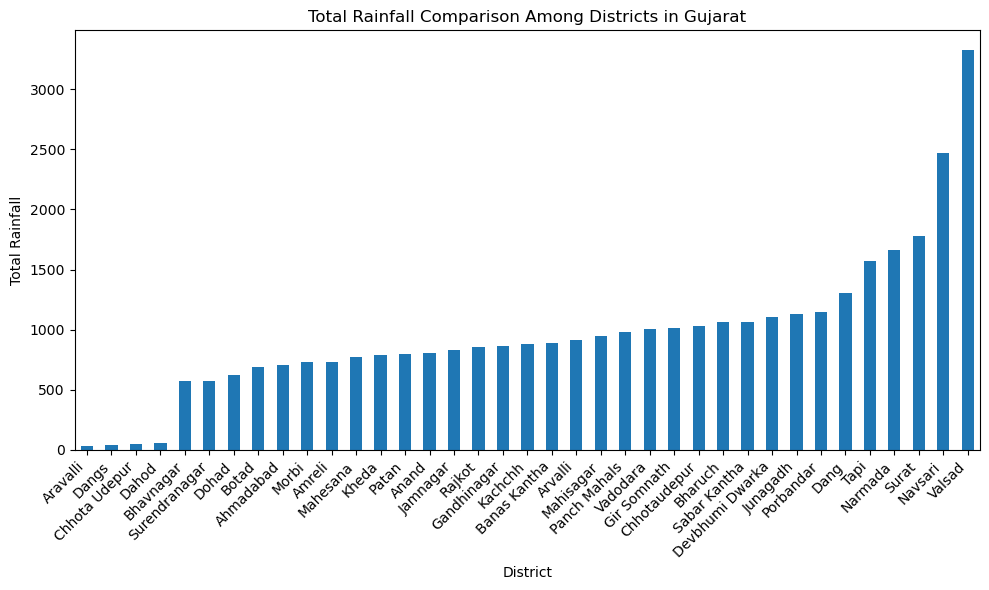

the monthly total rainfall : month                  1          2         3         4          5   \
district                                                              
Ambala         154.057323  32.515981  0.028155  0.134354  37.568207   
Bhiwani         41.432061   5.003909  0.016090  0.126709  25.452236   
Charkhi Dadri         NaN        NaN       NaN       NaN        NaN   
Charki Dadri    66.450343   8.446819  0.000000  0.130954  30.836566   
Faridabad       53.441791  15.950110  0.255049  0.000000  42.340202   
Fatehabad       41.731269  10.281152  0.121563  1.474218  30.859788   
Gurugram        93.827898  17.666610  0.000000  0.178420  52.527518   
Hisar           49.817883   8.943110  0.032345  1.246497  30.361895   
Jhajjar         87.300335  14.305035  0.000000  0.057750  52.064035   
Jind            76.328439  22.916990  0.000000  0.335390  35.965256   
Kaithal        101.927656  36.308447  0.000000  0.018128  61.871067   
Karnal         106.034475  30.190933  0.000000  

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

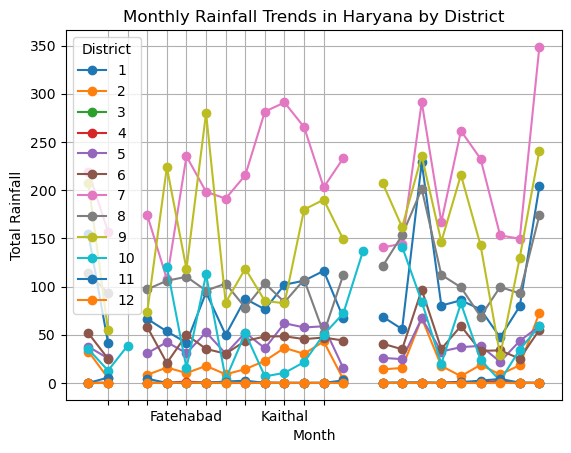

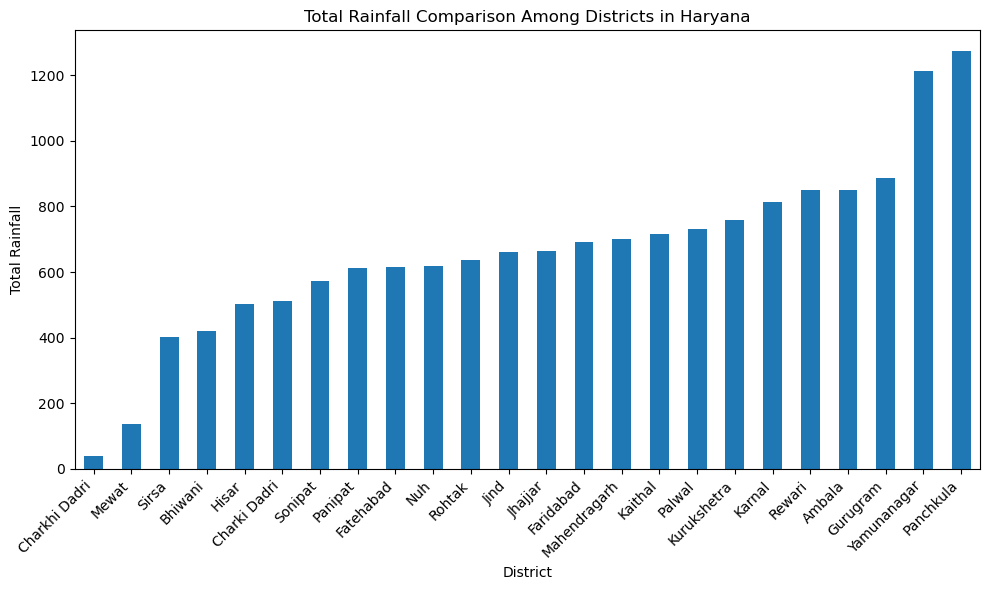

the monthly total rainfall : month                  1          2          3          4          5   \
district                                                                
Bilaspur       198.340717  68.522098   5.518477   2.678618  51.313929   
Chamba         191.181130  76.146299  10.582181   8.556806  84.657119   
Hamirpur        99.231062  12.637680   1.274937   0.665385  22.862330   
Kangra         187.235249  68.299514   9.609304   9.377318  57.298583   
Kinnaur         81.094863  42.102365   5.422953   9.512205  37.097808   
Kullu          150.249906  97.210158   9.071510  19.623291  72.722749   
Lahul & Spiti  125.098658  67.159069   8.147107  13.049025  45.765292   
Mandi          147.015944  86.709028   9.441996  12.178531  92.908280   
Shimla         159.292591  75.522101   2.096720   6.384230  83.526435   
Sirmaur        217.972385  79.075558   0.874141   1.334080  91.168019   
Solan          211.906587  91.345686   4.709329   6.114483  86.003997   
Una            183.364

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

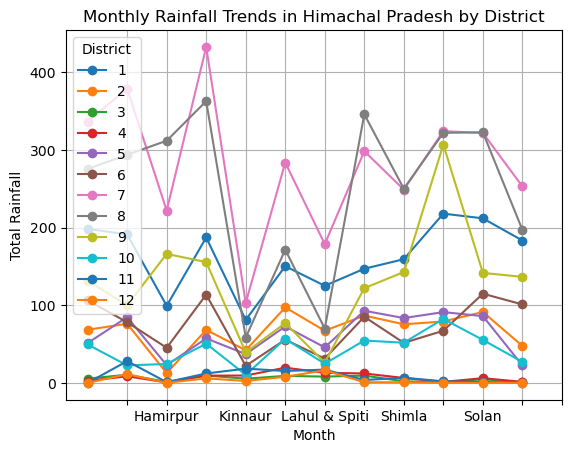

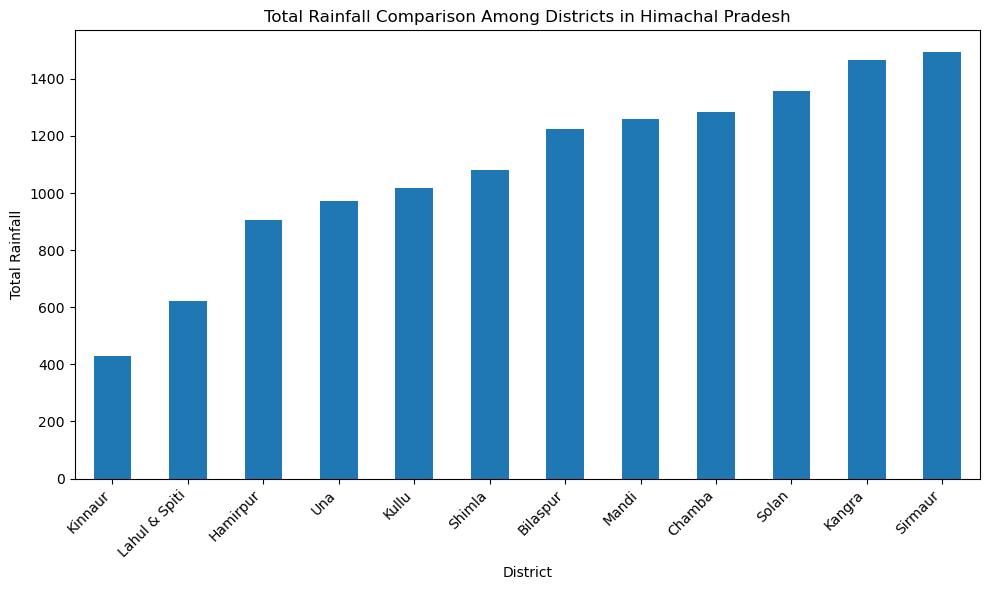

the monthly total rainfall : month                 1           2          3          4           5   \
district                                                                 
Anantnag      137.226367  118.136021  22.018607  39.324315   88.015646   
Badgam               NaN         NaN        NaN        NaN         NaN   
Bandipora     100.009744   77.498795  35.196433  37.398887   56.371707   
Bandipura            NaN         NaN        NaN        NaN         NaN   
Baramula             NaN         NaN        NaN        NaN         NaN   
Baramulla     134.434677   92.749261  50.814811  62.492064   80.351309   
Budgam        117.217111  100.558571  35.125646  49.064055   75.585151   
Doda          255.053879   88.873172   6.710612  13.837518   76.239873   
Ganderbal     128.188514  100.654683  37.584847  40.353138   76.389155   
Jammu         276.717887   72.339247   3.349829   2.525820   74.398136   
Kathua        257.508085   76.567466   2.340586   5.775490   85.495177   
Kishtwar 

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

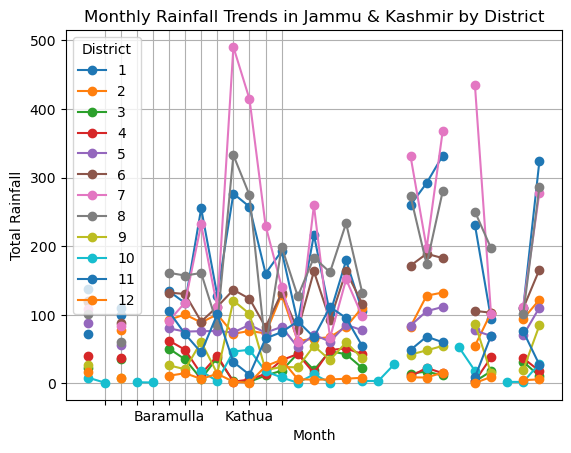

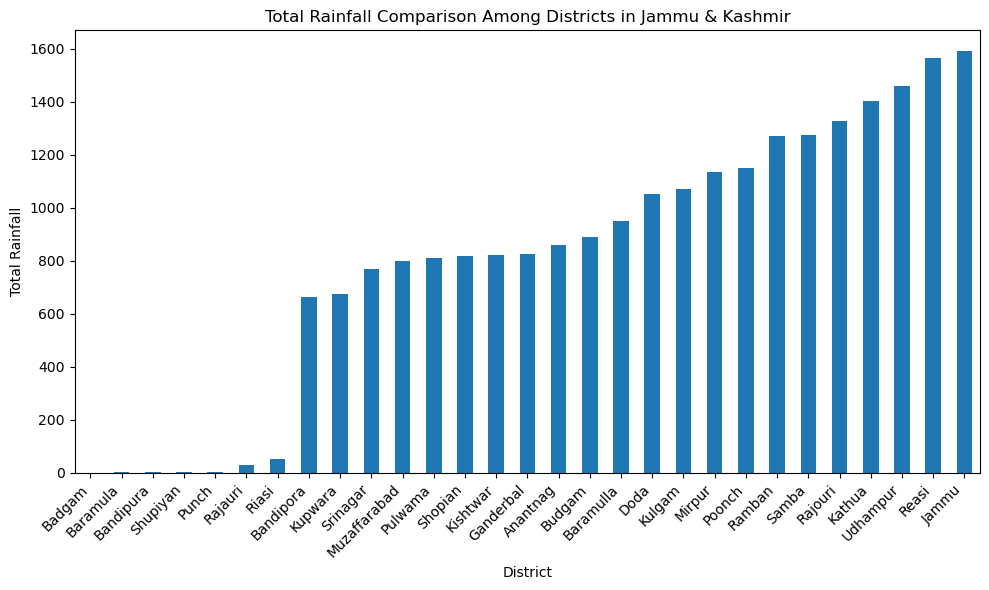

the monthly total rainfall : month                       1          2         3          4           5   \
district                                                                     
Bokaro               22.732309  55.634129  0.000000   1.705693   74.676641   
Chatra               22.437439  30.322911  0.000000   0.994669   36.867021   
Deoghar              25.179598  62.300612  0.000000   0.235345  132.730540   
Dhanbad              11.227500  63.114078  0.000000   0.360661  132.656536   
Dumka                16.113367  56.152013  0.000000   4.366012  122.200865   
East Singhbhum             NaN        NaN       NaN        NaN         NaN   
East Singhbum        27.941753  54.289009  1.125171   6.705971  117.449014   
Garhwa               10.136919  22.565655  0.540811   0.000000   26.703199   
Giridih              20.365666  56.727992  0.000000   0.158493   56.015171   
Godda                 7.639813  51.223307  0.090489  12.409744  149.934271   
Gumla                33.106644  41.

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

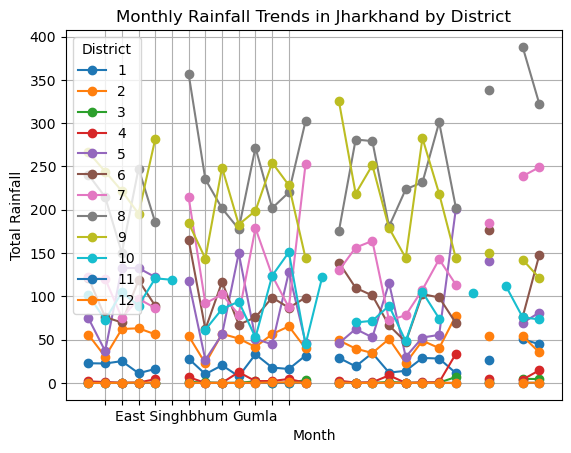

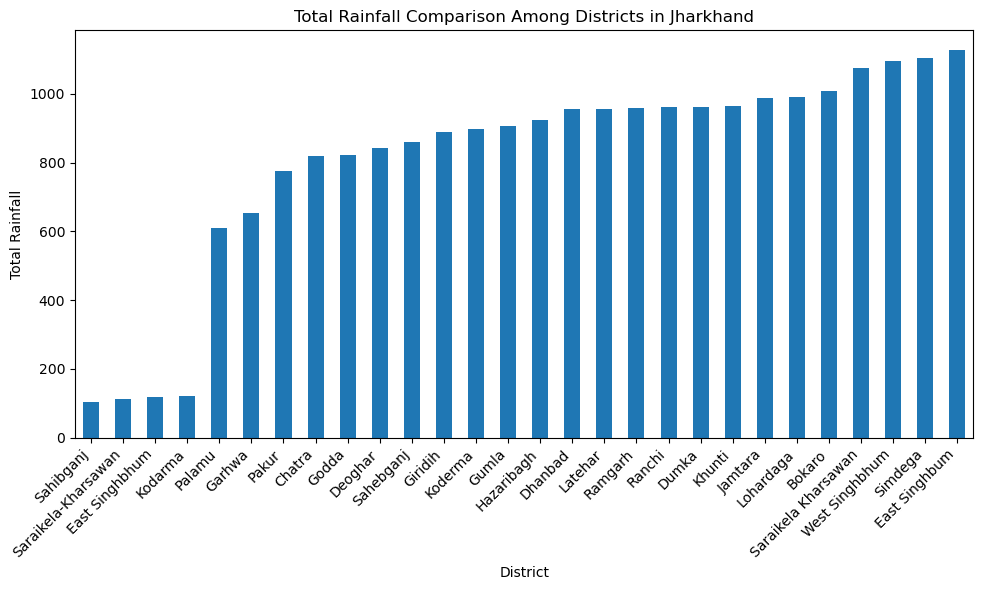

the monthly total rainfall : month                   1         2          3           4           5   \
district                                                                  
Bagalkot               NaN       NaN        NaN         NaN         NaN   
Bagalkote         0.000000  0.000000   3.791105   24.473175  124.886030   
Ballari           0.115782  0.000000   2.235519   28.195548  114.055255   
Belagavi          0.139329  0.000000  11.297145   62.158122  117.835840   
Bengaluru Rural   1.304810  0.000000   7.380811   55.274572  239.423546   
Bengaluru Urban   3.678740  0.000000  10.659527   57.308559  276.264342   
Bidar             4.361982  0.000000   2.070083    9.280724   52.173942   
Chamarajanagar         NaN       NaN        NaN         NaN         NaN   
Chamarajanagara   2.715861  0.004182  15.140628   65.633310  208.348963   
Chik Ballapur          NaN       NaN        NaN         NaN         NaN   
Chikkaballapura   2.310726  0.000000   6.581540   20.075349  150.247103

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

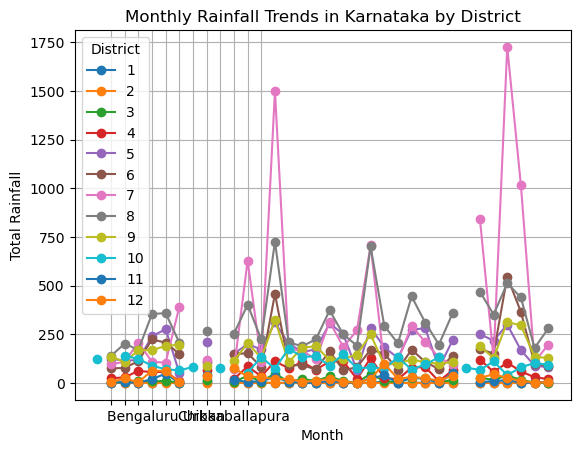

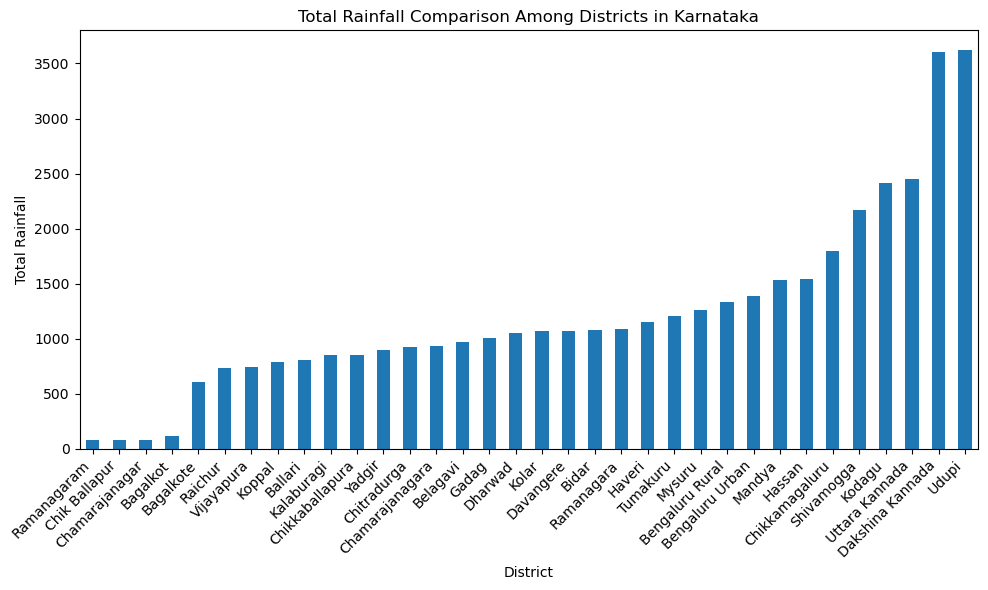

the monthly total rainfall : month                      1          2          3           4           5   \
district                                                                      
Alappuzha            3.009976  20.641127  62.280162  375.618849  431.535474   
Ernakulam            4.197030  11.356960  59.893968  244.564056  564.471926   
Idukki              23.189486  10.542452  48.503396  218.929695  253.912162   
Kannur               0.000000   0.294025  40.925809  136.290740  348.285663   
Kasaragod            0.001176   2.627600  51.144415  153.390865  350.886382   
Kollam              23.763640  12.025004  59.873936  254.136136  320.282986   
Kottayam             5.685821  23.758456  67.369264  326.006080  474.635989   
Kozhikode            1.354273   1.597720  38.216805  133.285061  364.541881   
Malappuram           4.739827   0.470490  36.525919   98.244490  300.911798   
Palakkad             5.632593   0.118864  36.329769  101.833415  247.790659   
Pathanamthitta      29.

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

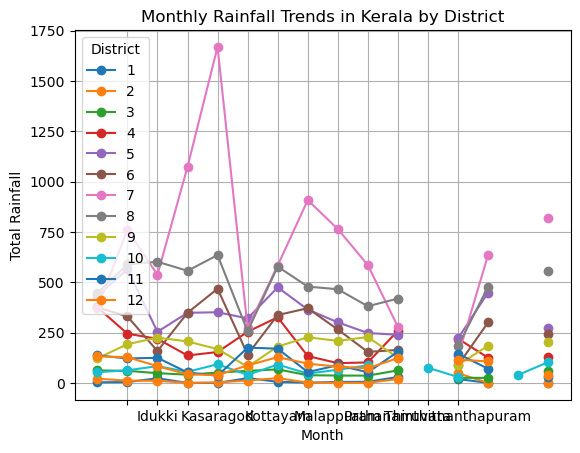

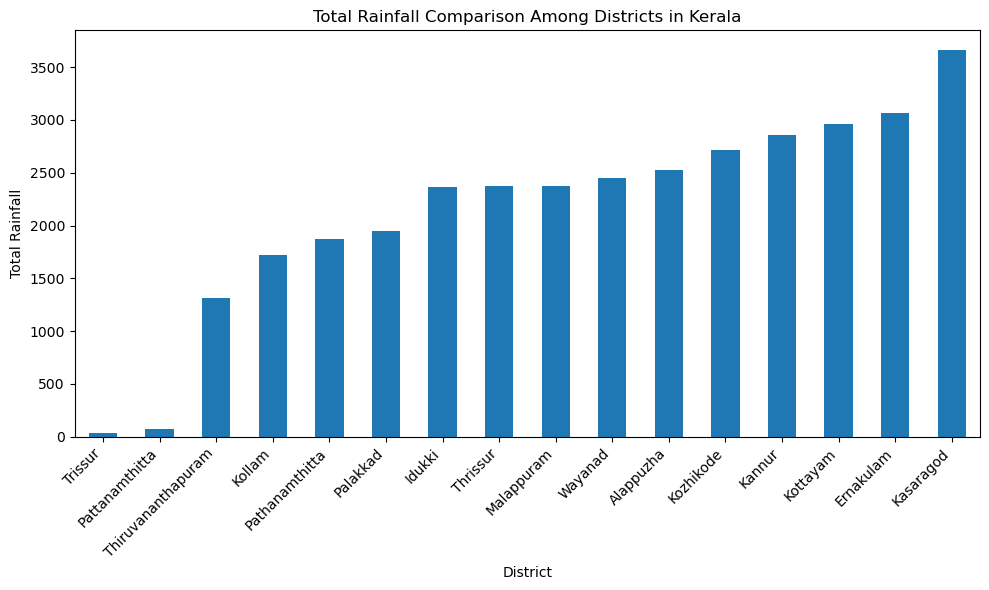

the monthly total rainfall : month              1          2          3         4          5          6   \
district                                                                      
Kargil      87.643290  58.883074  12.278859  6.395679  38.895636  28.300379   
Leh               NaN        NaN        NaN       NaN        NaN        NaN   
Leh Ladakh  33.992188  26.688872  11.259849  9.592871  12.087454  17.097032   

month               7          8         9         10         11         12  
district                                                                     
Kargil      142.259069  19.340769  8.056184  8.491851  46.711936  19.003769  
Leh                NaN        NaN       NaN  1.921329        NaN        NaN  
Leh Ladakh   62.180680  31.335981  7.682784       NaN  54.684529  35.875946  




average rainfall for each district in each month : month              1          2          3         4          5          6   \
district                                           

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

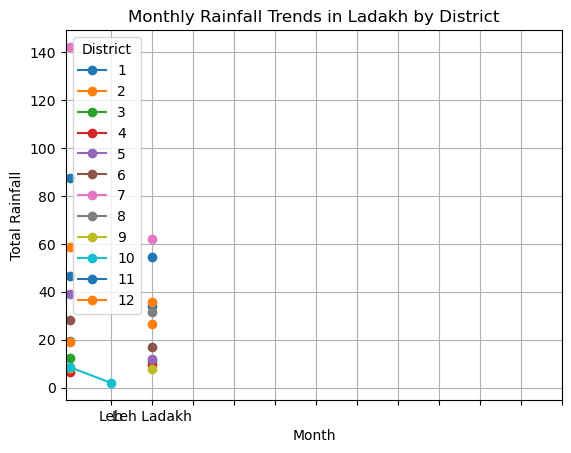

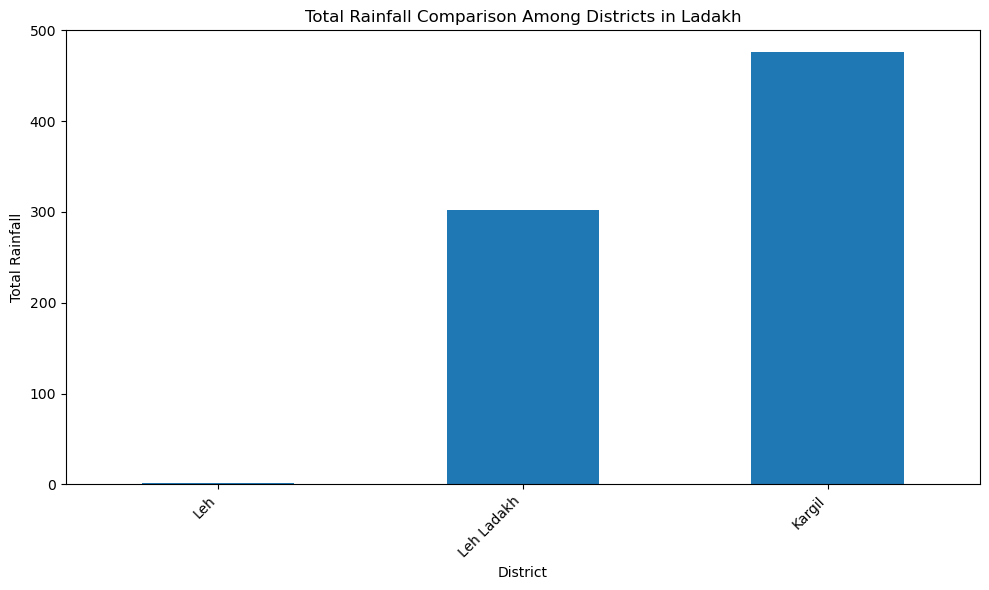

the monthly total rainfall : month                  1    2    3    4    5    6    7    8    9    10   11  \
district                                                                      
Lakshadweep           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN   
Lakshadweep District  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  0.0   

month                  12  
district                   
Lakshadweep           NaN  
Lakshadweep District  0.0  




average rainfall for each district in each month : month                  1    2    3    4    5    6    7    8    9    10   11  \
district                                                                      
Lakshadweep           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN   
Lakshadweep District  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  0.0   

month                  12  
district                   
Lakshadweep           NaN  
Lakshadweep District  0.0  




maximum rainfall for each district :             state

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

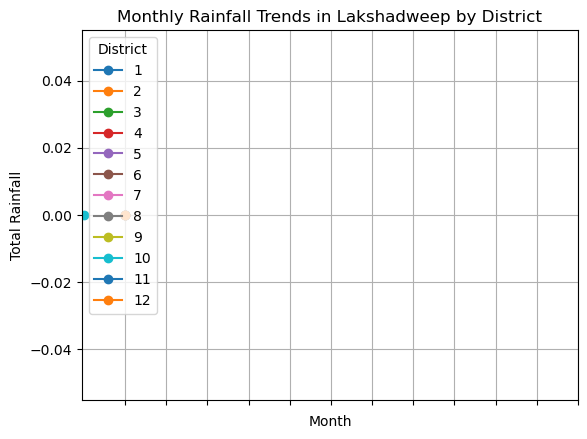

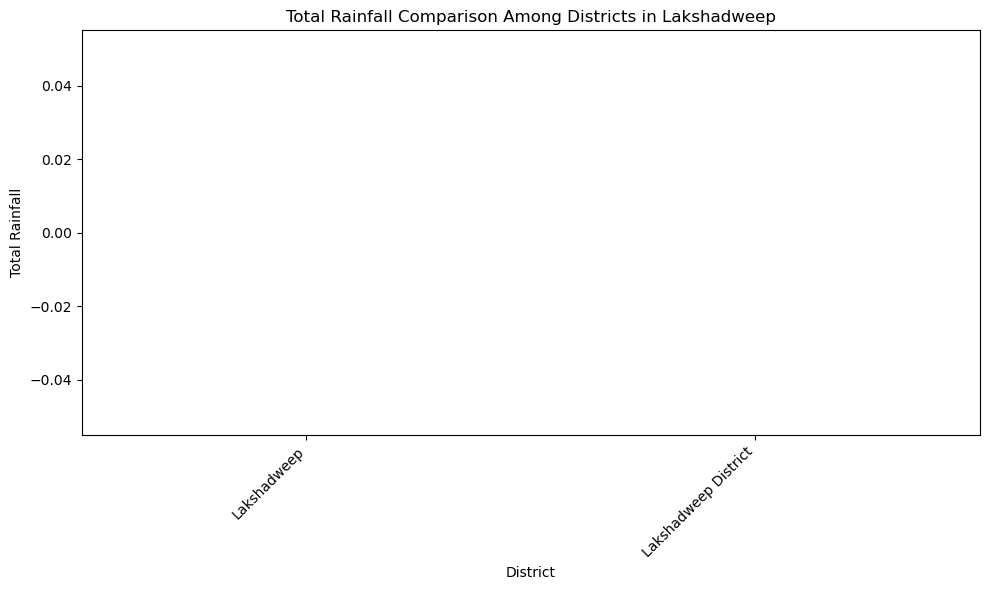

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


the monthly total rainfall : month                1          2          3         4          5   \
district                                                             
Agar Malwa    19.066857   0.000000   0.435977  0.000000   0.504517   
Alirajpur     12.196932   0.000000   0.707796  0.000000   0.000000   
Anuppur       25.979590  26.966700   4.495533  0.249061  16.595296   
Ashoknagar    51.700967   0.000000   1.187780  0.000000  14.925292   
Balaghat      27.996309   8.605967   0.088931  2.020643  14.547476   
Barwani       10.653045   0.000000   0.957439  0.000000   0.000000   
Betul         20.220088   0.555203   3.196903  0.252683   2.107374   
Bhind         22.013143   2.559020   0.001803  0.000000   5.847077   
Bhopal        34.460659   0.000000   0.243249  0.000000   5.035466   
Burhanpur      1.114351   0.000000   3.505123  0.000000   1.738810   
Chhatarpur    84.741136   0.211840   0.742395  0.000000  19.368251   
Chhindwara    37.930331   6.496613   1.280464  0.096892   6.2

<Figure size 1200x600 with 0 Axes>

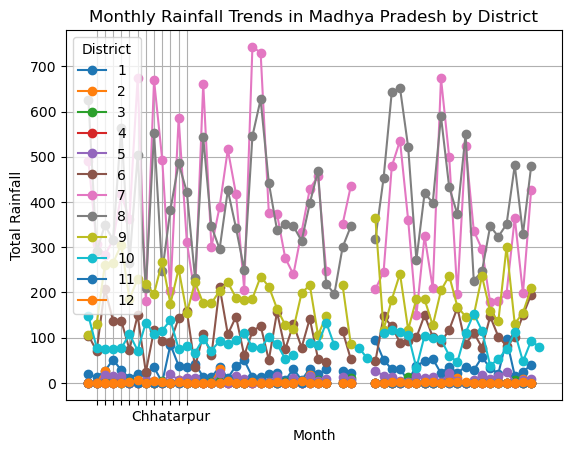

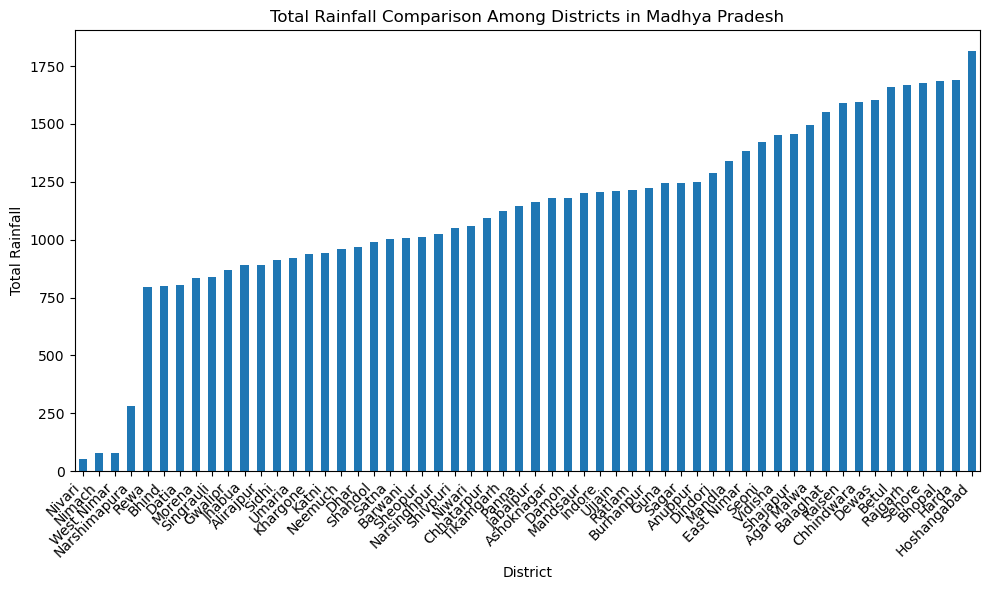

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


the monthly total rainfall : month                    1         2         3          4          5   \
district                                                                
Ahamadnagar             NaN       NaN       NaN        NaN        NaN   
Ahmednagar         0.001022  0.000000  1.398128   0.104705   2.711270   
Akola              3.299478  0.035527  0.054157   0.000000   0.244395   
Amaravati               NaN       NaN       NaN        NaN        NaN   
Amravati          17.341568  0.097190  0.157152   0.004160   0.913800   
Aurangabad         8.245670  3.884105  3.652663   0.000000   4.755289   
Beed               0.135224  0.000000  0.000000   0.037460   0.231536   
Bhandara          11.482264  0.075313  0.000000   0.436202   1.345423   
Bid                     NaN       NaN       NaN        NaN        NaN   
Buldhana           1.100006  0.000000  0.036168   0.000000   0.000000   
Chandrapur        59.350339  0.084375  0.009105   0.152948   1.408347   
Dhule              4.0

<Figure size 1200x600 with 0 Axes>

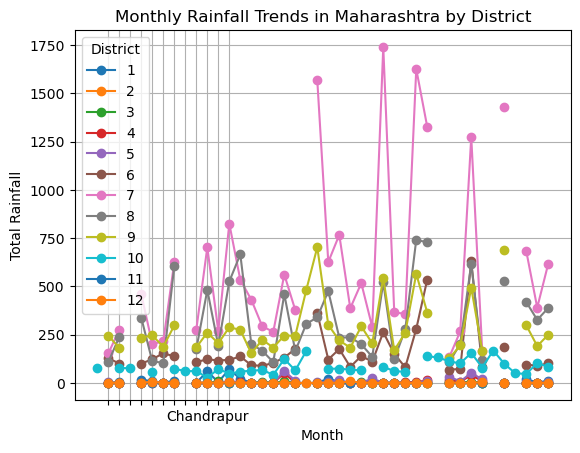

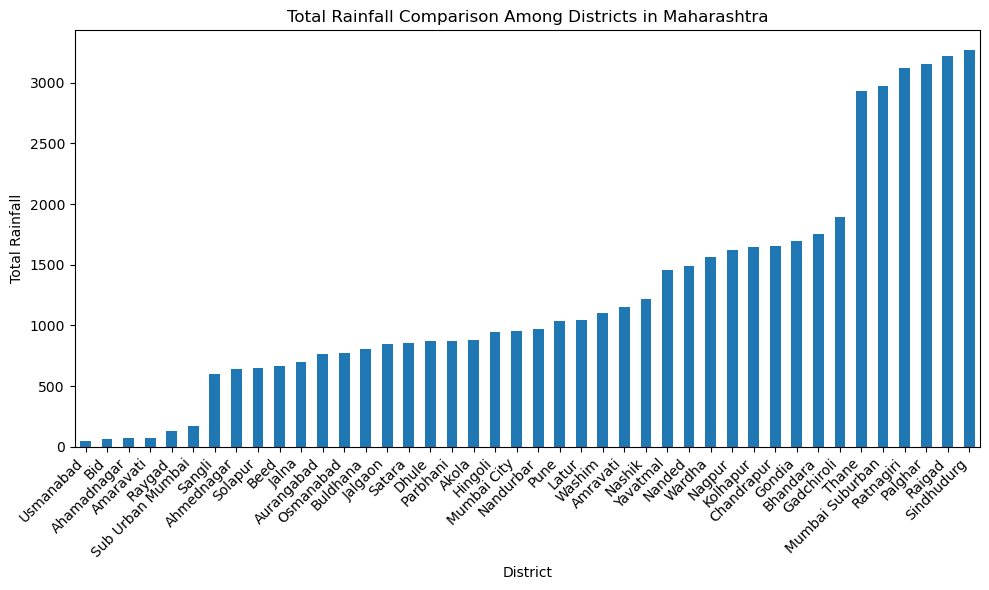

the monthly total rainfall : month                 1          2          3           4           5   \
district                                                                 
Bishnupur      21.198409  40.034431  13.400812  142.142020  354.328976   
Chandel        18.222788  34.859061  11.168760  125.001712  308.014787   
Churachandpur  21.393846  39.954914  14.406748  146.035268  372.460344   
Imphal East    22.840889  41.887135  13.534834  134.021733  315.331831   
Imphal West    22.403755  41.278524  13.741776  136.279257  327.910634   
Jiribam        23.020032  40.011831  25.412211  164.407678  457.634507   
Kakching       21.636119  40.153333  13.902360  142.038141  349.490607   
Kamjong        17.560197  34.654152   8.506506  109.974591  197.186417   
Kangpokpi      23.160055  44.662536  10.428426  134.054685  278.083100   
Nonei                NaN        NaN        NaN         NaN         NaN   
Noney          25.034160  40.907628  20.085909  148.230734  370.169257   
Pherzawl 

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

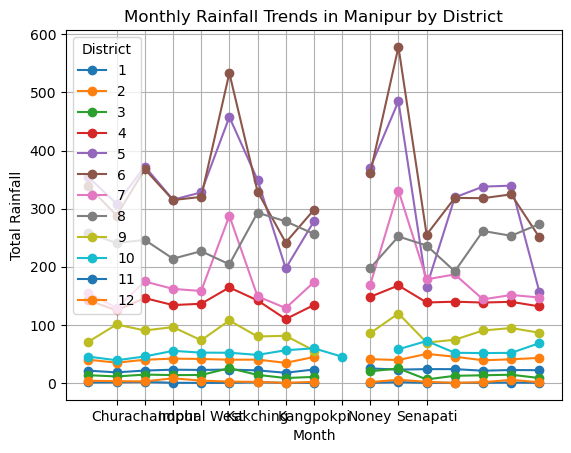

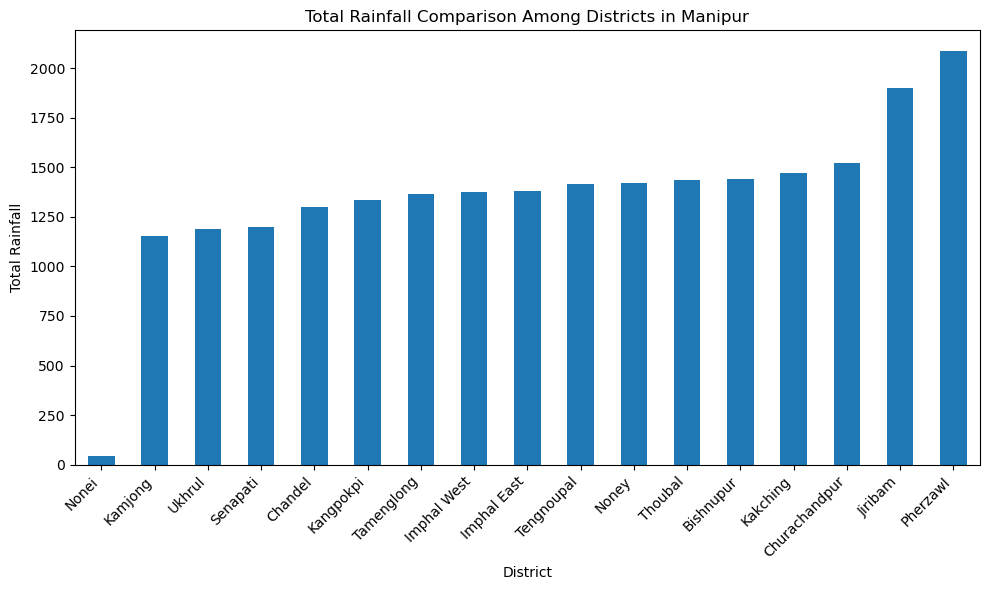

the monthly total rainfall : month                          1          2           3            4   \
district                                                                
East Garo Hills         19.099883  60.186375  138.196887   635.410700   
East Jaintia Hills      25.560693  55.373744  138.163906   459.164669   
East Khasi Hills        30.119665  42.070861  126.967516   810.945480   
North Garo Hills        17.962151  57.437583   54.293008   427.158657   
Ri Bhoi                 36.930374  34.242850   20.226000   182.977204   
Ri-Bhoi                       NaN        NaN         NaN          NaN   
South Garo Hills        21.725109  59.725959  272.799495  1019.760113   
South West Garo Hills   16.189465  46.288028    7.649329   221.483079   
South West Khasi Hills  21.962412  57.417647  456.010840  1478.799940   
West Garo Hills         16.721699  54.600332   18.795364   281.284700   
West Jaintia Hills      25.502625  39.974665   51.714284   324.319192   
West Khasi Hills      

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

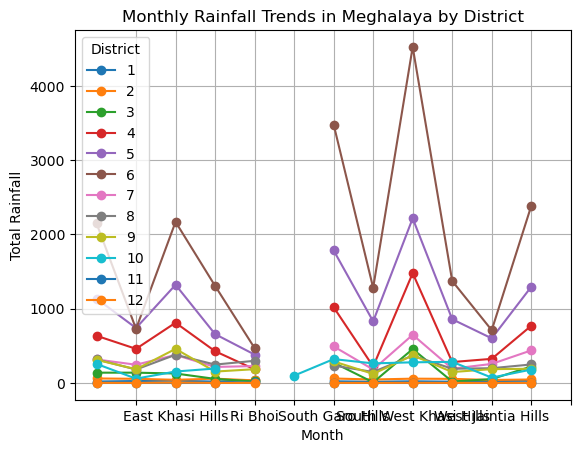

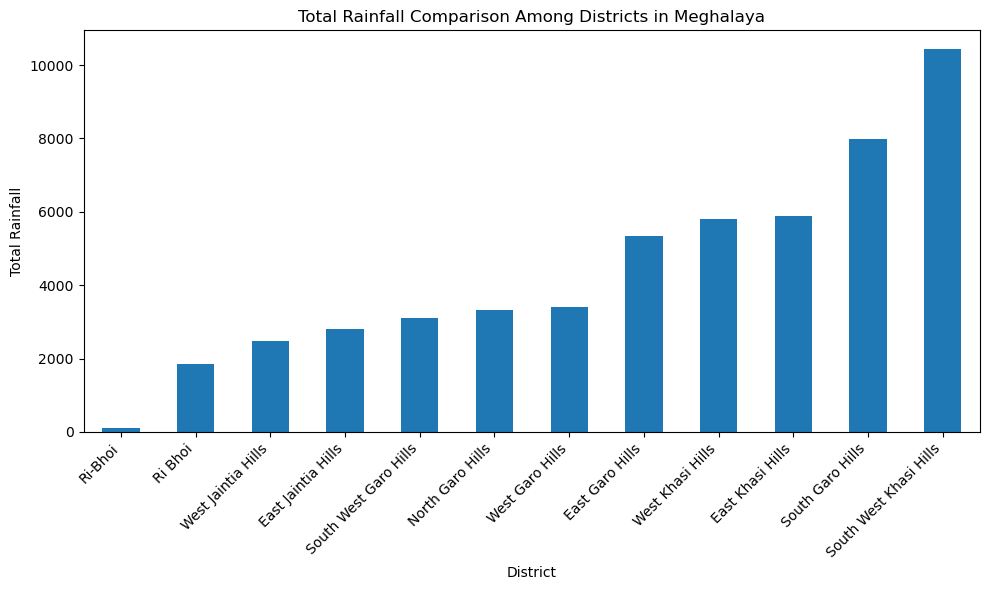

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


the monthly total rainfall : month             1          2          3           4           5   \
district                                                             
Aizawl     13.848525  40.152057  27.983979   98.787461  413.897954   
Aizwal           NaN        NaN        NaN         NaN         NaN   
Champhai    8.536140  51.859551  16.010468   53.240003  287.749903   
Kolasib    18.441092  29.598020  42.430615  154.211810  515.738885   
Lawngtlai   3.584042  79.019173   0.833883   16.215271  281.362955   
Lunglei     5.320353  84.637657   5.978767   34.469749  280.619631   
Mamit      10.075166  33.453219  26.248577   58.822186  345.974862   
Saiha       3.316423  73.596631   0.525081   14.074383  266.182411   
Serchhip    6.661531  84.078963  15.641417   42.540730  284.384175   

month              6           7           8           9           10  \
district                                                                
Aizawl     457.670451  387.194674  258.937022  156.205

<Figure size 1200x600 with 0 Axes>

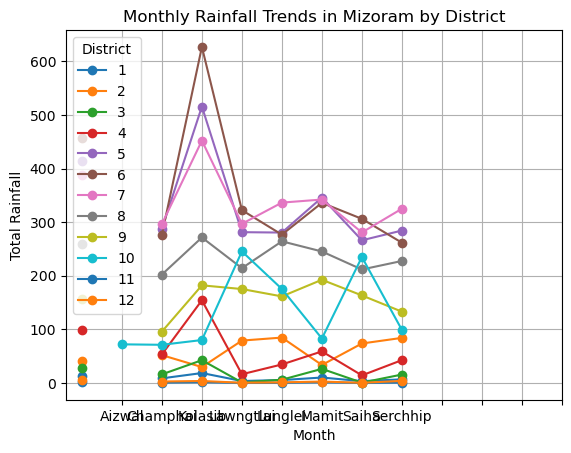

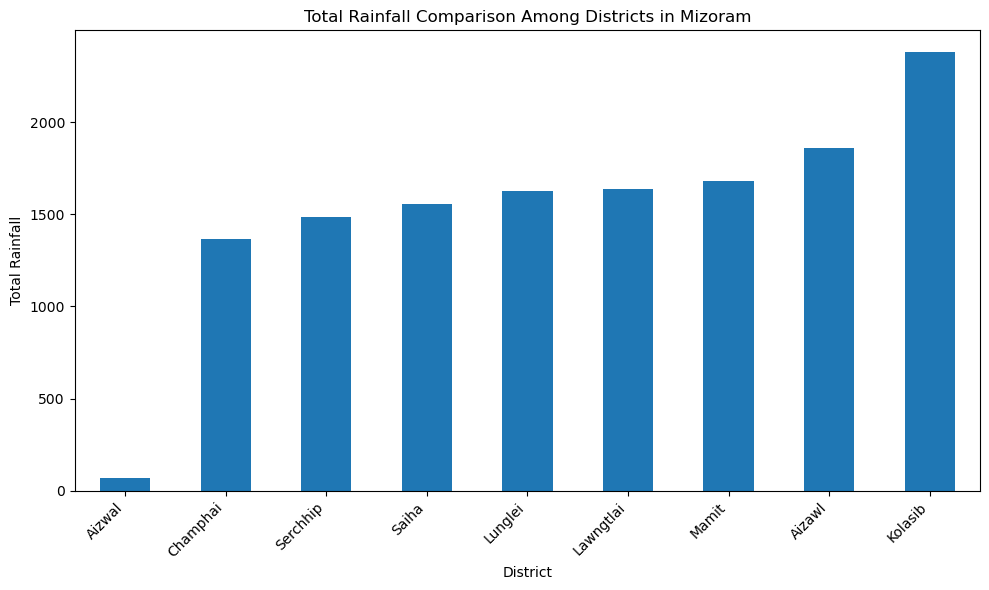

the monthly total rainfall : month              1          2          3           4           5   \
district                                                              
Dimapur     29.646871  58.445811   4.550267  133.144246  188.990572   
Kiphire     29.517781  49.492140  16.787366  138.544911  143.206537   
Kohima      24.000986  48.494300   8.734909  143.588074  145.788104   
Longleng    36.180496  67.143178  29.223685  257.049486  222.956051   
Mokokchung  38.285593  66.244738  23.929164  204.224975  191.978166   
Mon         29.867751  59.204019  38.481542  362.027414  287.179456   
Paren             NaN        NaN        NaN         NaN         NaN   
Peren       32.289431  58.629242   4.836298  126.150628  220.779405   
Phek        19.961535  36.611027  10.108252  110.973974  113.896520   
Tuensang    33.352742  55.306241  19.933310  152.102827  155.858403   
Wokha       37.104812  60.520944  17.474506  153.723788  163.491951   
Zunheboto   31.661648  52.127595  17.173532  141

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

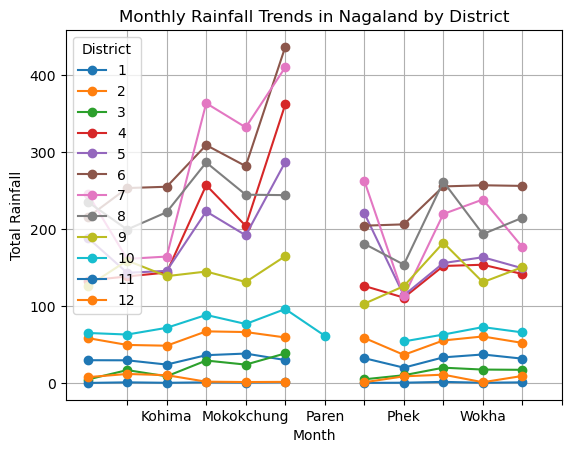

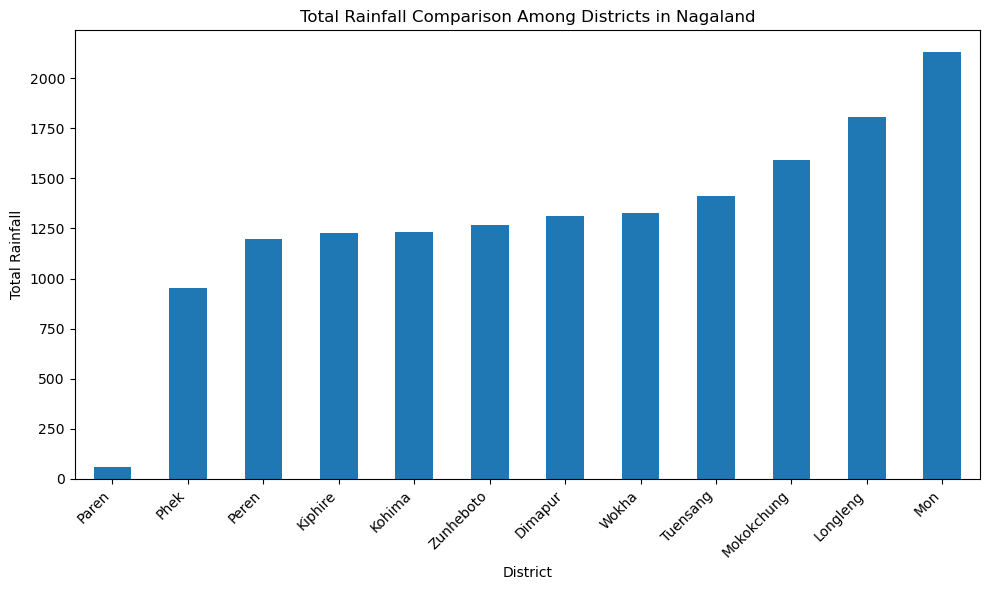

the monthly total rainfall : month                        1          2         3          4           5   \
district                                                                      
Anugul                36.465145   5.575588  0.173438   6.514543   81.182877   
Balangir              47.936937   3.783540  0.000000   7.144418   45.566568   
Balasore (Baleshwar)        NaN        NaN       NaN        NaN         NaN   
Baleshwar             19.031738  37.059294  0.193088   3.344203   85.547371   
Baragarh                    NaN        NaN       NaN        NaN         NaN   
Bargarh               37.750414   7.196143  0.060030   3.894541   32.212490   
Baudh (Bauda)               NaN        NaN       NaN        NaN         NaN   
Bhadrak               26.490962  32.958229  0.287802   2.166906   83.531903   
Bolangir (Balangir)         NaN        NaN       NaN        NaN         NaN   
Boudh                 36.194414   1.018720  0.000000   7.578756   76.839932   
Cuttack               3

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

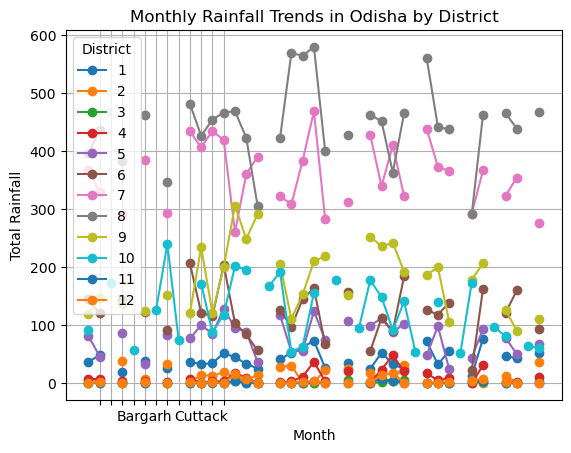

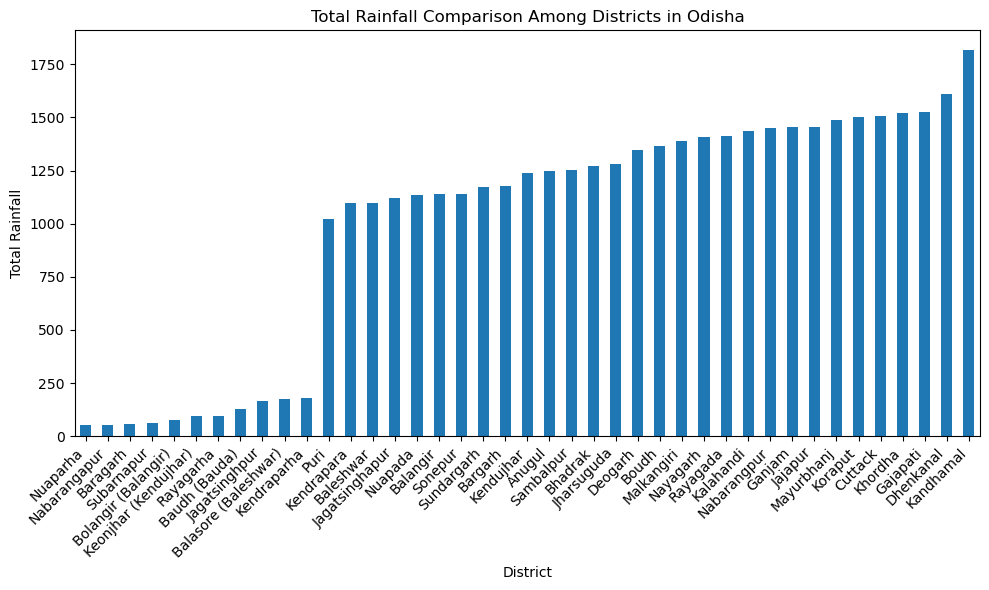

the monthly total rainfall : month               1          2          3           4           5   \
district                                                               
Karaikal     98.189131  78.364829  27.622484   49.668613   25.576669   
Mahe          0.000000   0.000000  33.500000  132.000000  439.900000   
Pondicherry  54.669278  10.445800  12.849752   13.623312  124.419364   
Puducherry         NaN        NaN        NaN         NaN         NaN   
Yanam        16.700000   0.000000   4.700000   29.400000   76.500000   

month                6           7           8           9           10  \
district                                                                  
Karaikal       7.958899   32.331643   98.755881   67.024063   19.320920   
Mahe         528.100000  915.600000  551.872900  196.904000   31.900000   
Pondicherry   61.865973  103.224308  118.248842   51.322401         NaN   
Puducherry          NaN         NaN         NaN         NaN   69.936373   
Yanam        163

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

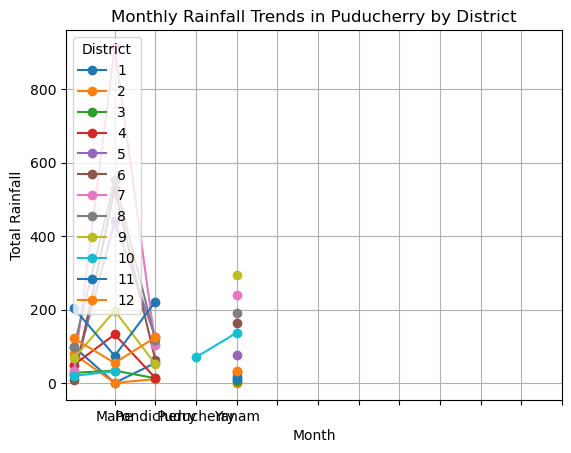

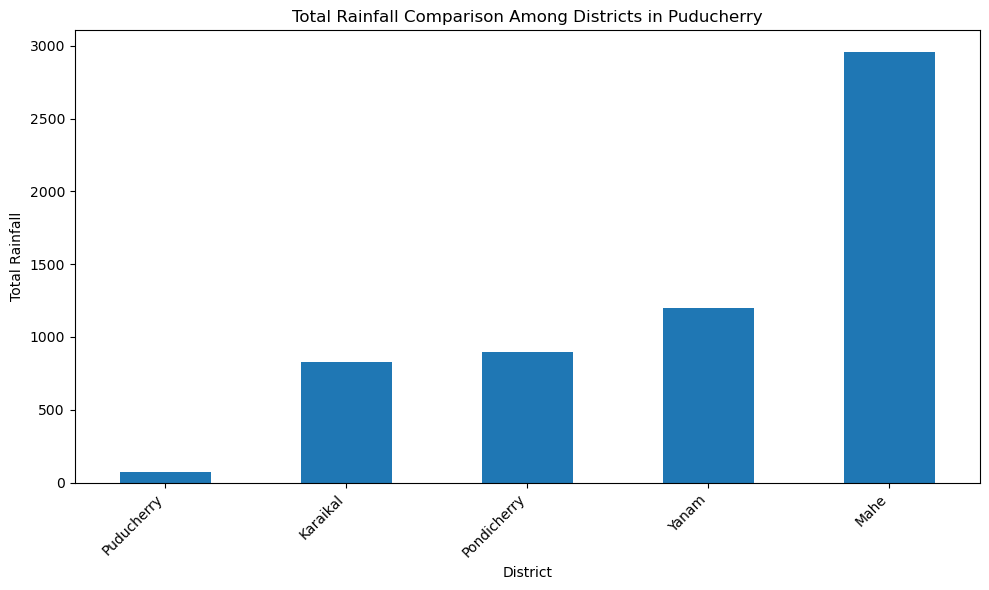

the monthly total rainfall : month                                           1          2         3   \
district                                                                  
Amritsar                                136.018960  30.348264  0.805564   
Barnala                                  94.886985  15.389927  0.000000   
Bathinda                                 72.177813  14.630718  0.133115   
Faridkot                                100.061560  21.205443  0.278881   
Fatehgarh Sahib                         138.472938  24.371448  0.081170   
Fazilka                                  49.236094   4.846589  0.353095   
Firozepur                               110.505497  25.742617  0.599394   
Firozpur                                       NaN        NaN       NaN   
Gurdaspur                               171.264596  32.216425  1.022750   
Hoshiarpur                              169.742121  37.951530  0.962932   
Jalandhar                               141.510276  35.913468  1.724690

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

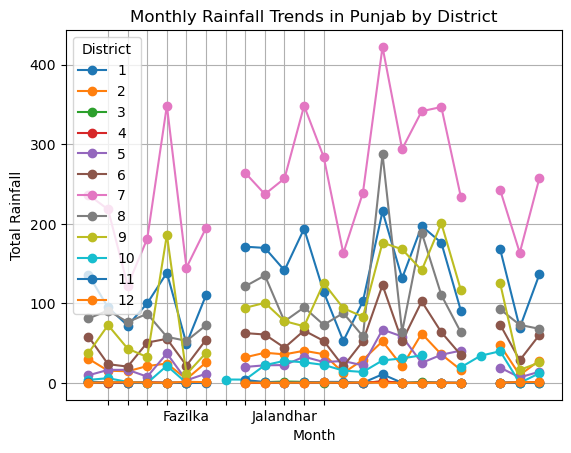

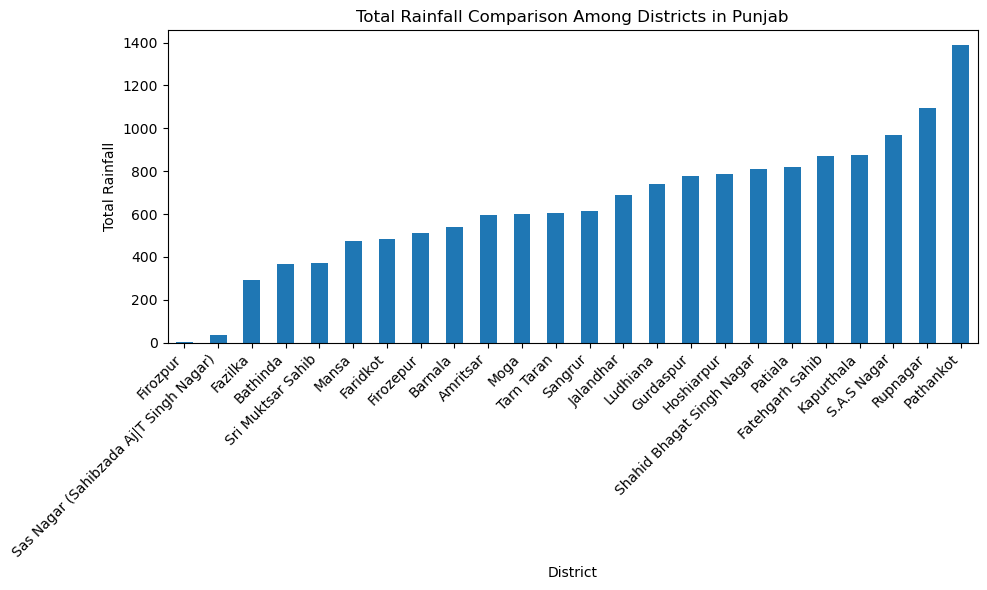

the monthly total rainfall : month                  1         2          3         4          5   \
district                                                              
Ajmer           23.452496  0.079166   1.942219  0.000000  12.228842   
Alwar           61.337027  8.169873   0.042887  0.096740   9.808737   
Banswara         2.306959  0.000000   2.150393  0.000000   9.503860   
Baran           32.887500  0.000000   1.875755  0.000000   8.066161   
Barmer           9.517653  0.000000   0.001865  0.000000   0.517406   
Bharatpur       30.791467  5.527907   0.000158  0.000000   6.955709   
Bhilwara         9.227304  0.000000   6.568891  0.000000   7.009072   
Bikaner         28.679820  3.645693   0.753486  0.389512   4.582286   
Bundi           17.701060  0.000000   4.647499  0.000000  11.283487   
Chittaurgarh          NaN       NaN        NaN       NaN        NaN   
Chittorgarh      6.865679  0.000000  16.347586  0.000000   4.844992   
Churu           39.668604  5.044686   3.322427  

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

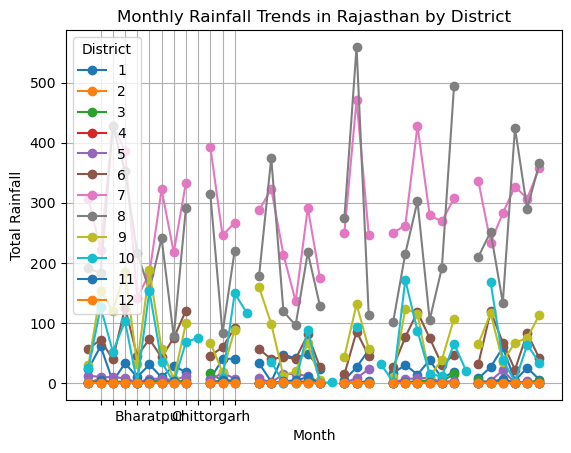

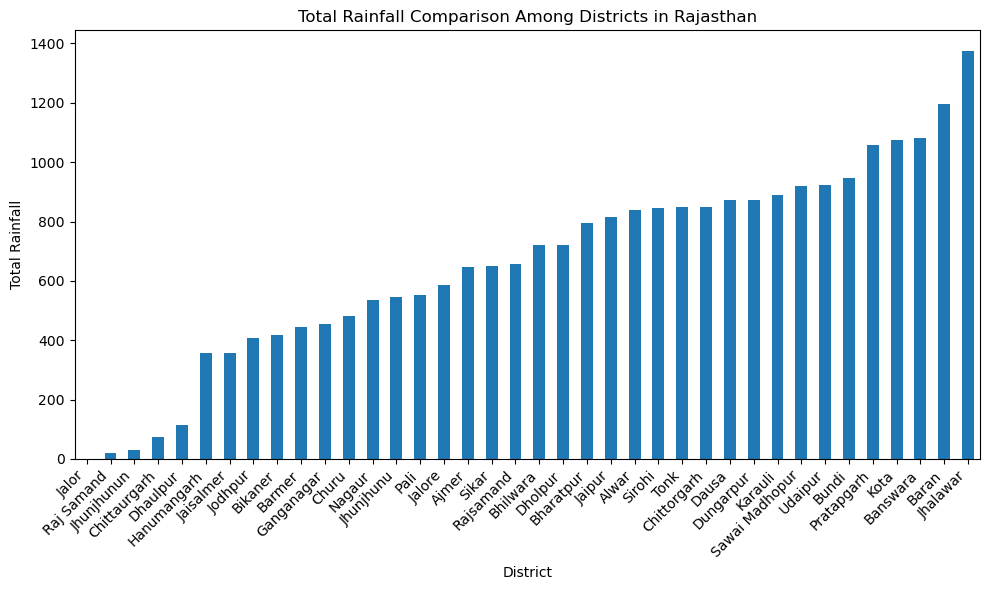

the monthly total rainfall : month                  1           2           3           4           5   \
district                                                                    
East                  NaN         NaN         NaN         NaN         NaN   
East District   20.237845   57.017576   69.992446  369.148038  415.823670   
North                 NaN         NaN         NaN         NaN         NaN   
North District  52.954320  126.088932  113.835723  384.284832  387.099608   
South                 NaN         NaN         NaN         NaN         NaN   
South District  35.729435   71.282738   82.280143  327.187055  384.948652   
West                  NaN         NaN         NaN         NaN         NaN   
West District   44.817364   90.366738  103.735819  329.737589  372.559315   

month                  6           7           8           9           10  \
district                                                                    
East                  NaN         NaN         

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

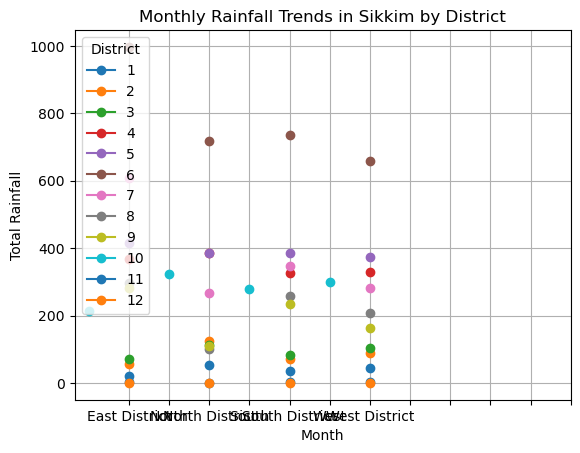

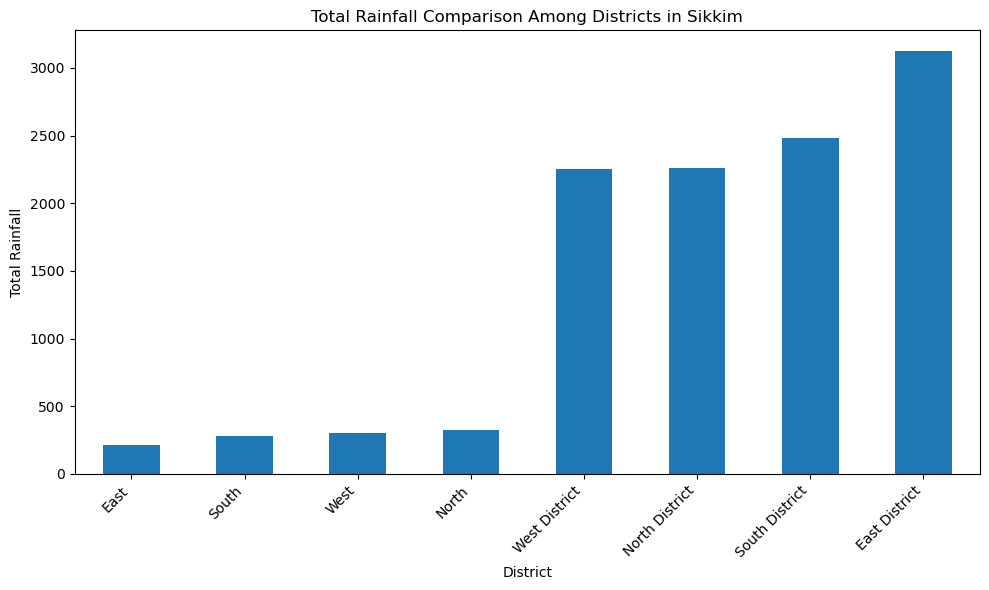

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


the monthly total rainfall : month                    1          2          3           4           5   \
district                                                                    
Ariyalur          87.553967  38.950618  22.602671   60.239586   62.246990   
Chengalpattu      28.642034   0.000000   4.537110    0.699800   23.460674   
Chennai           32.412628   0.000000   0.878987    0.000000   20.875941   
Coimbatore        12.228709   1.032358  21.770167   96.199290  159.548044   
Cuddalore         60.602985  43.424903  25.048155   38.166767   78.411771   
Dharmapuri         9.025976   0.020363  10.862036   36.940965  139.016418   
Dindigul          55.095578   1.228895  10.352426   83.032726   81.201744   
Erode             10.254452   0.011424   5.565073   69.351569  142.942465   
Kallakkurichi           NaN        NaN        NaN         NaN         NaN   
Kallakurichi      33.890128   1.634292   8.571250   41.223825   81.181226   
Kanchipuram       36.285937   0.000000   0.8478

<Figure size 1200x600 with 0 Axes>

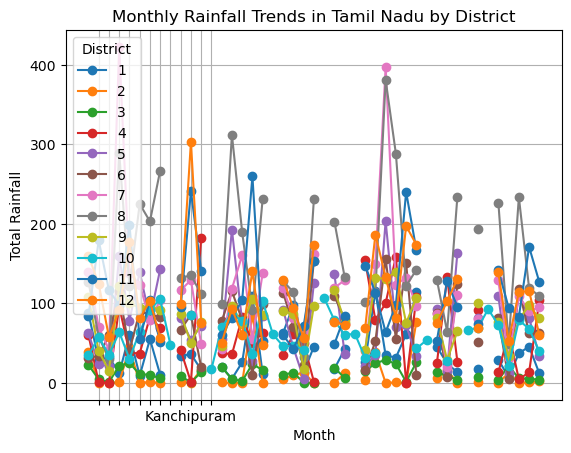

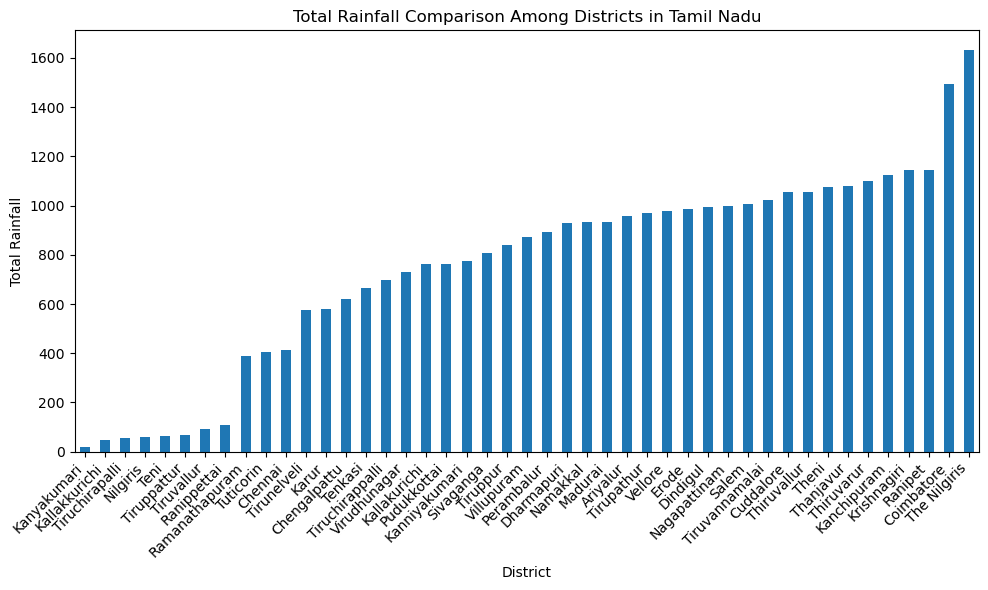

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


the monthly total rainfall : month                             1         2          3          4   \
district                                                               
Adilabad                   48.152147  0.075905   0.223715   1.998382   
Bhadradri Kothagudem       23.343319  0.000000  12.086713   7.939271   
Hyderabad                   8.595135  0.000000   0.419112  20.861066   
Jagitial                   44.791698  0.000000   3.326785   2.463251   
Jagtial                          NaN       NaN        NaN        NaN   
Jangaon                          NaN       NaN        NaN        NaN   
Jangoan                    88.910310  0.000000   2.181620   5.720701   
Jayashankar Bhupalapally   56.414906  0.000000   0.000000   0.408911   
Jogulamba Gadwal           22.950061  0.000000   2.911166   4.195265   
Kamareddy                  20.862162  0.025663   0.593049   1.371006   
Karimnagar                 46.258938  0.000000   0.027796   0.228324   
Khammam                    27.37027

<Figure size 1200x600 with 0 Axes>

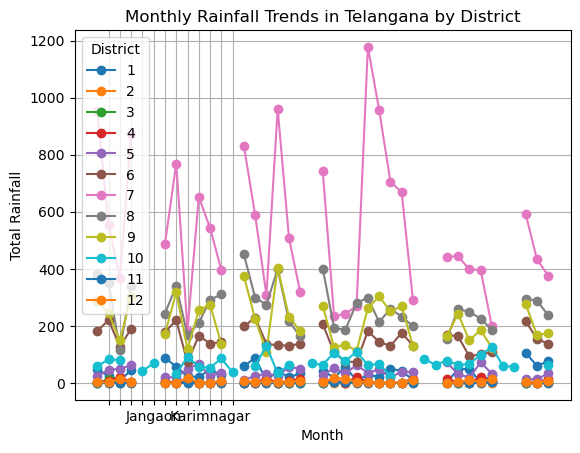

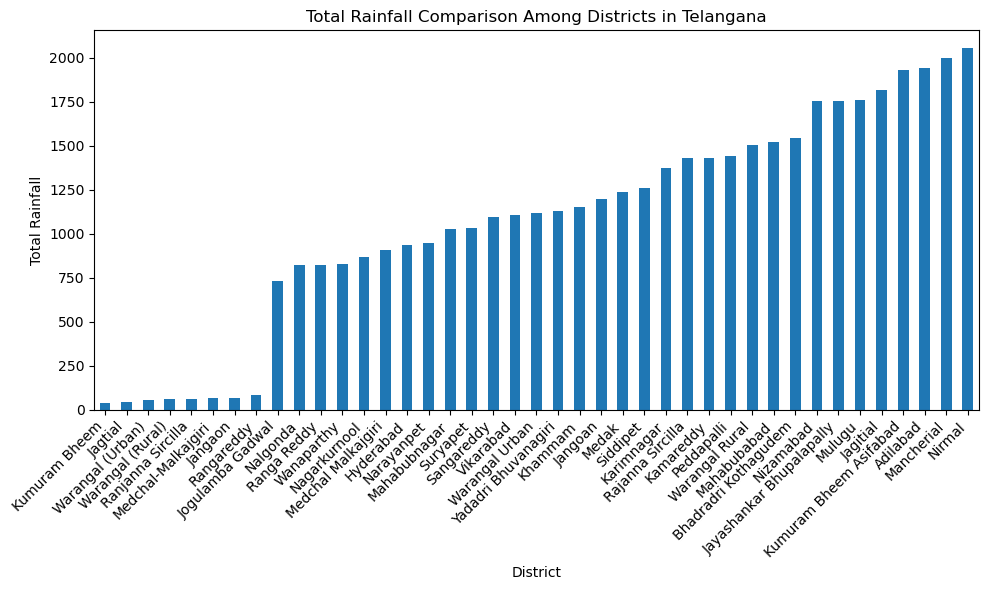

the monthly total rainfall : month                 1          2          3           4           5   \
district                                                                 
Dhalai         17.221955  18.406233  28.376803   66.859186  369.668383   
Gomati          7.131364  20.155655  31.113680  159.170158  398.180389   
Khowai         23.715541  34.704772  48.072609   78.206903  445.559232   
North Tripura  14.670581  17.234484  35.971874   94.162749  425.251433   
Sepahijala      6.243892  26.139935  35.029050  212.455659  384.756325   
South Tripura   2.496389  11.185255  20.195188  117.628559  370.204036   
Unakoti        21.129538  18.015227  30.375840   99.355155  471.824770   
Unokoti              NaN        NaN        NaN         NaN         NaN   
West Tripura   16.451212  35.137083  45.587060  125.173289  440.862404   

month                  6           7           8           9           10  \
district                                                                    
Dh

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

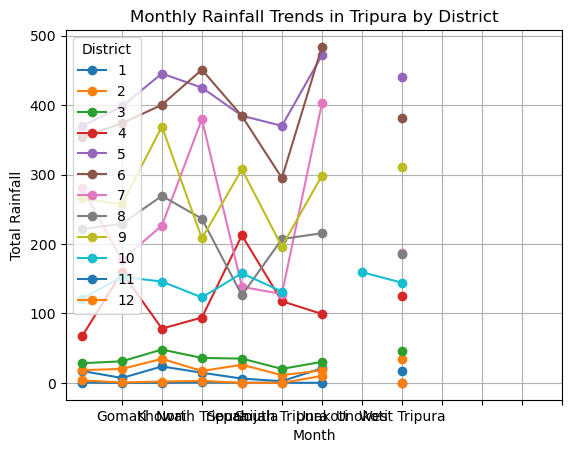

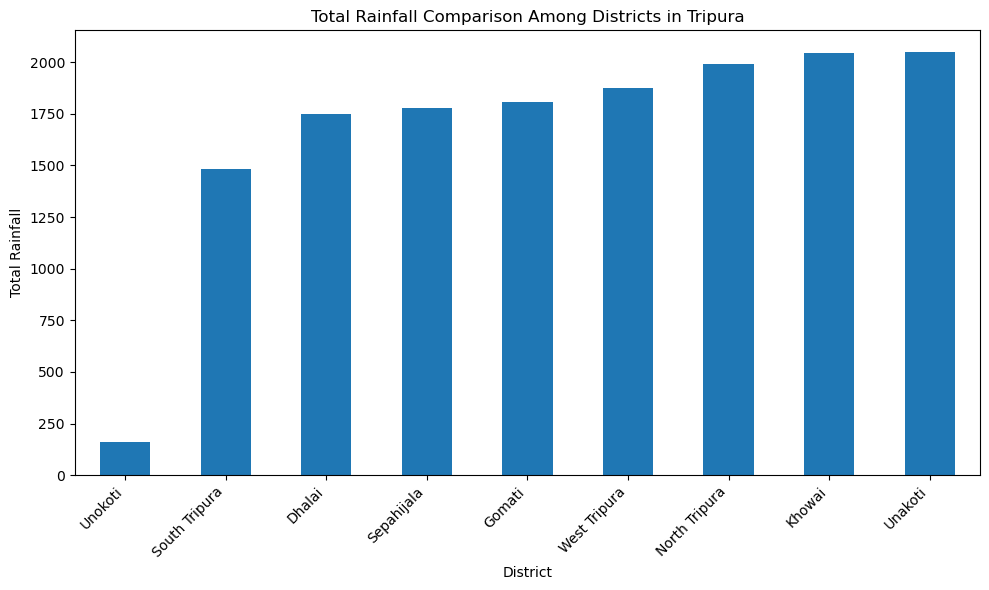

the monthly total rainfall : month                  1          2         3         4          5   \
district                                                              
Agra            26.187090   3.160622  0.000000  0.000000  12.863035   
Aligarh         35.003505  24.531695  0.156445  0.000000  28.107690   
Ambedkar Nagar  16.187363   7.020010  0.000000  0.000000  10.868925   
Ambedkarnagar         NaN        NaN       NaN       NaN        NaN   
Amethi          29.541355   2.628165  0.000000  0.000000  27.985216   
...                   ...        ...       ...       ...        ...   
Sitapur         23.898593  22.265732  0.000000  0.000000  59.201355   
Sonbhadra       13.134130   7.313590  0.000086  0.000043  18.480857   
Sultanpur       19.206522   2.791727  0.000000  0.000000  17.971352   
Unnao           29.427433   6.002853  0.000000  0.000000   8.744127   
Varanasi        14.278607   3.852606  0.000000  0.000000   4.788267   

month                  6           7           

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

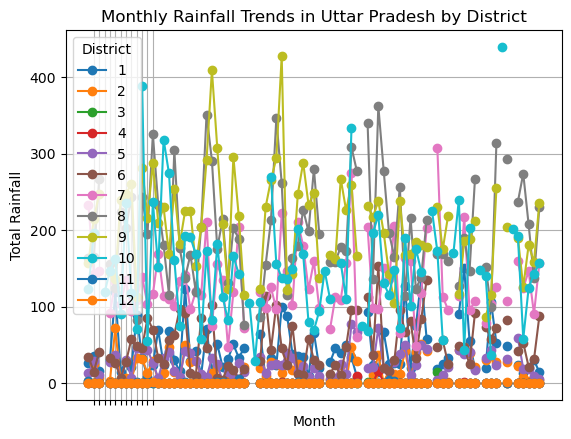

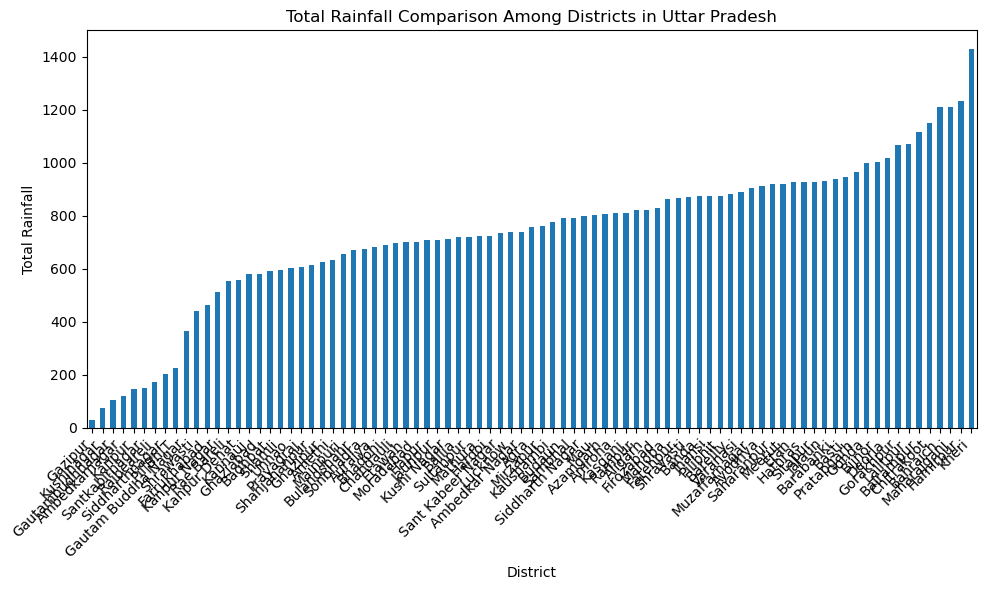

the monthly total rainfall : month                      1          2         3          4           5   \
district                                                                    
Almora              78.416373  41.580712  0.609208   3.553639  104.414023   
Bageshwar           71.778611  52.555630  5.724070  16.464576  122.406148   
Chamoli             93.998965  63.142599  5.763429  17.303513   78.193464   
Champawat           78.720918  42.077973  1.120098   6.953802  188.506850   
Dehradun           149.073264  53.961189  0.233534   3.225177   89.658265   
Haridwar           125.578254  56.452600  0.000021   2.483004   62.321946   
Nainital            98.205945  47.944080  0.397034   1.493077   75.200312   
Pauri Garhwal      102.260770  35.974331  0.176769   1.877598   69.358913   
Pithoragarh         78.367836  60.540565  7.104622  18.003774  167.222833   
Rudra Prayag       110.192003  62.858666  4.584191  16.849955   93.781705   
Rudraprayag               NaN        NaN       

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


<Figure size 1200x600 with 0 Axes>

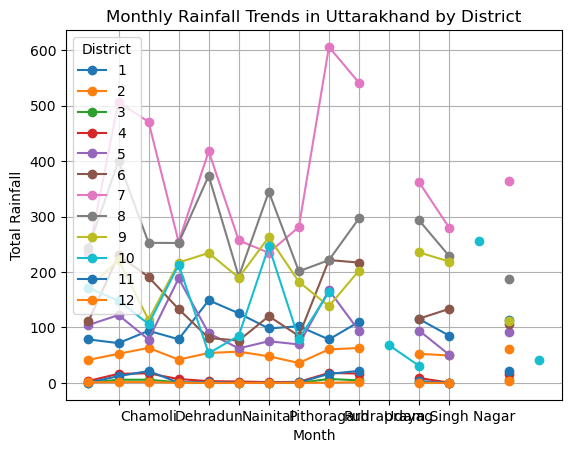

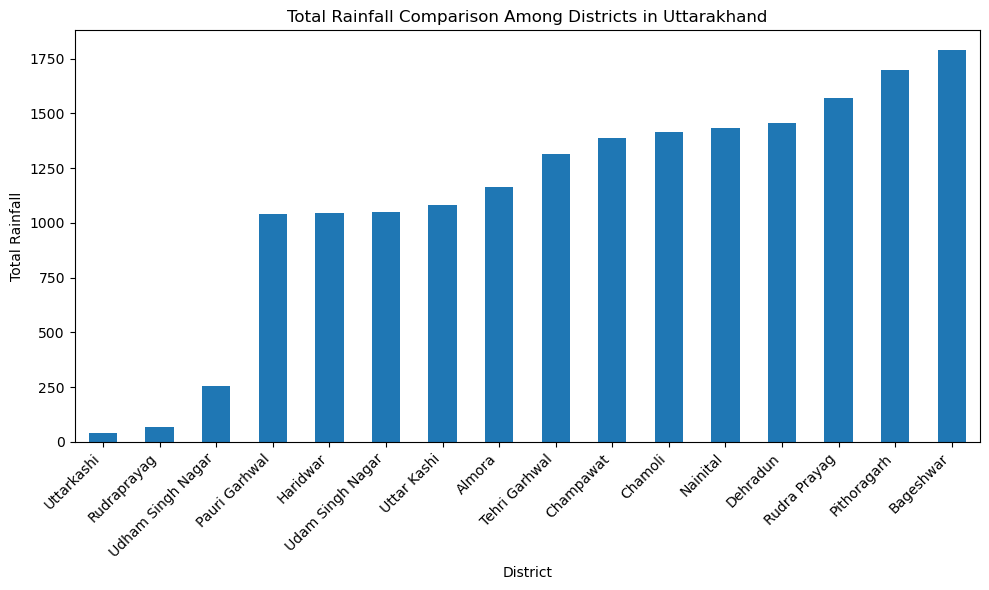

/tmp/ipykernel_20/3828924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Total_Rainfall'] = state_data.iloc[:, 3:].sum(axis=1)


the monthly total rainfall : month                              1          2          3           4   \
district                                                                  
24 Paraganas North          12.301102  34.471586   0.000000    0.000018   
24 Paraganas South          16.610375  52.238550   1.536690    0.114744   
Alipur Duar                       NaN        NaN        NaN         NaN   
Alipurduar                   7.400907  48.181479  35.839633  557.917605   
Bankura                     29.615847  56.355503   0.396068   21.809614   
Birbhum                     14.935872  64.396032   0.000000   10.912137   
Coochbehar                   4.611604  54.196567  41.858167  496.699374   
Dakshin Dinajpur                  NaN        NaN        NaN         NaN   
Darjeeling                  11.779362  35.840586  26.825608  135.483289   
Darjiling                         NaN        NaN        NaN         NaN   
Dinajpur Dakshin             6.036433  14.600831   2.603372   18.447922

<Figure size 1200x600 with 0 Axes>

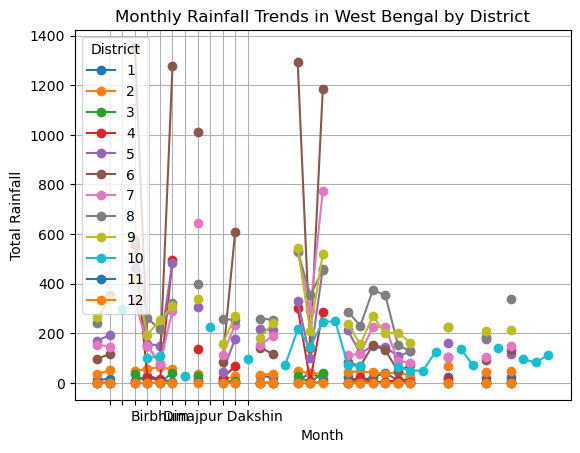

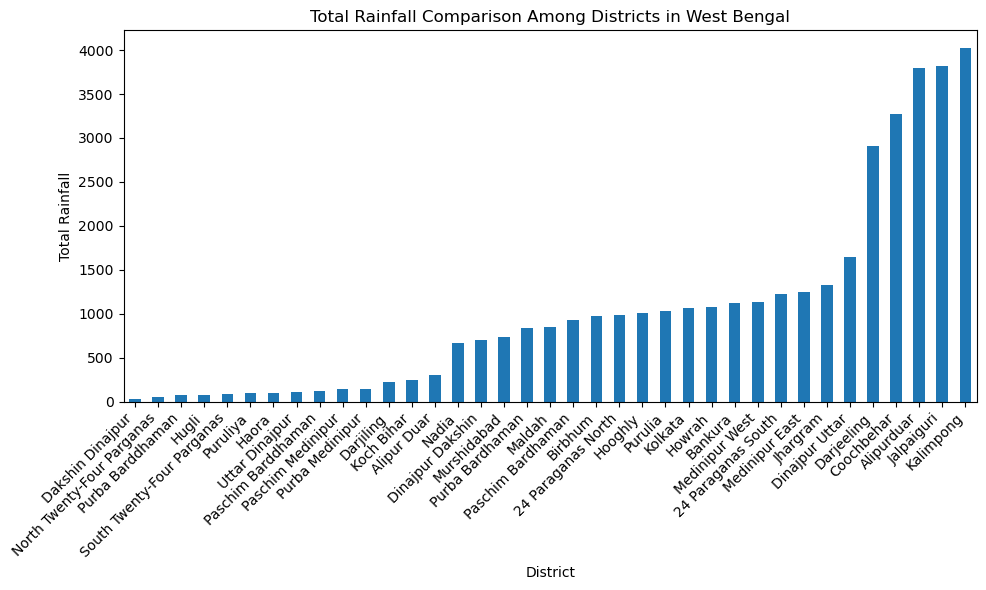

In [18]:
# performing function on each state
for x in rain['state'].unique():
    state_name = x
    results = analyze_rainfall_data(state_name)
